In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import tqdm as tqdm
import matplotlib.pyplot as plt

In [93]:
df=pd.read_csv(r"C:\Users\John\Desktop\Formation\10-Analyser la charge des acteurs d'une pièce de théâtre\1-Projet 10\Le_malade_imaginairea.csv",encoding='latin1',sep=';',header=None)

In [94]:
df

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
0,MALADE,IMAGINAIRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,du,PROLOGUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,DERNIERE,ENTREE,DE,BALLET.,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,Des,"medecins,",des,chirurgiens,et,des,"apothicaires,",qui,sortent,tous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   if 'MONSIEUR' in str(df.iloc[r, :])==False:
                    data.append([0, 0, df.iloc[r, 0], 0])
                else:
                    data.append([0, 0, df.iloc[r, 0]+df.iloc[r, 1], 0])

In [95]:
data = [['Acte', 'Scene', 'Personnage', 'Nb de mots']]
lnom = ['ARGAN', 'BELINE', 'TOINETTE', 'CLEANTE', 'BERALDE', 'DIAFOIRUS', 'ANGELIQUE', 'PURGON', 'LOUISON', 'MONSIEUR']
lstage=['ACTE','SCENE','PROLOGUE','PREMIER','SECOND','TROISIEME']
cw = 0
for r in tqdm.tqdm(df.index):
    if any([step for step in lstage if step in str(df.iloc[r, :])]):
        if r>1:
            data[-1][3] = cw
        data.append([f'{df.iloc[r, 0]} {df.iloc[r, 1]}', 0, 0, 0])
        cw=0
        print('step ', df.iloc[r, 0],' ',df.iloc[r, 1], ' detecté in row ', r)

    else:

        if any([nom for nom in lnom if nom in str(df.iloc[r, :])]):
            
            if data[-1][0]==0:
                
                data[-1][3] = cw
                data.append([0, 0, df.iloc[r, 0], 0])

                cw=0
                print('nom', df.iloc[r, 0], ' detecté in row ', r)

        else:

            cw = cw + df.iloc[r, :].notna().sum()
            print('nb de mots enregistrés : ', cw, 'in row ', r)

  0%|▎                                                                               | 12/2731 [00:00<00:48, 56.34it/s]

nb de mots enregistrés :  2 in row  0
step  du   PROLOGUE  detecté in row  1
nb de mots enregistrés :  0 in row  2
nb de mots enregistrés :  0 in row  3
nb de mots enregistrés :  0 in row  4
nb de mots enregistrés :  0 in row  5
nb de mots enregistrés :  0 in row  6
nb de mots enregistrés :  0 in row  7
nb de mots enregistrés :  0 in row  8
nb de mots enregistrés :  1 in row  9
nb de mots enregistrés :  3 in row  10
nb de mots enregistrés :  5 in row  11


  1%|▋                                                                               | 25/2731 [00:00<00:48, 55.39it/s]

nb de mots enregistrés :  8 in row  12
nb de mots enregistrés :  10 in row  13
nb de mots enregistrés :  13 in row  14
nb de mots enregistrés :  19 in row  15
nb de mots enregistrés :  25 in row  16
nb de mots enregistrés :  27 in row  17
nb de mots enregistrés :  29 in row  18
nb de mots enregistrés :  31 in row  22
nb de mots enregistrés :  33 in row  23
nb de mots enregistrés :  34 in row  24


  1%|█                                                                               | 37/2731 [00:00<00:47, 56.79it/s]

nb de mots enregistrés :  38 in row  25
nb de mots enregistrés :  38 in row  26
nb de mots enregistrés :  38 in row  27
nb de mots enregistrés :  38 in row  28
step  LE   PROLOGUE  detecté in row  29
nb de mots enregistrés :  0 in row  30
nb de mots enregistrés :  72 in row  31
nb de mots enregistrés :  81 in row  32
nb de mots enregistrés :  81 in row  33
nb de mots enregistrés :  81 in row  34
nb de mots enregistrés :  81 in row  35
nb de mots enregistrés :  101 in row  36
nb de mots enregistrés :  101 in row  37
nb de mots enregistrés :  101 in row  38
nb de mots enregistrés :  102 in row  39


  2%|█▍                                                                              | 49/2731 [00:00<00:53, 50.52it/s]

nb de mots enregistrés :  116 in row  40
nb de mots enregistrés :  130 in row  41
nb de mots enregistrés :  133 in row  42
nb de mots enregistrés :  143 in row  43
nb de mots enregistrés :  143 in row  44
nb de mots enregistrés :  146 in row  45
nb de mots enregistrés :  151 in row  46
nb de mots enregistrés :  152 in row  47
nb de mots enregistrés :  161 in row  48
nb de mots enregistrés :  162 in row  49
nb de mots enregistrés :  171 in row  50
nb de mots enregistrés :  174 in row  51
nb de mots enregistrés :  194 in row  52
nb de mots enregistrés :  197 in row  53
nb de mots enregistrés :  209 in row  54


  2%|█▉                                                                              | 67/2731 [00:01<00:52, 50.72it/s]

nb de mots enregistrés :  209 in row  55
nb de mots enregistrés :  210 in row  56
nb de mots enregistrés :  217 in row  57
nb de mots enregistrés :  218 in row  58
nb de mots enregistrés :  227 in row  59
nb de mots enregistrés :  230 in row  60
nb de mots enregistrés :  235 in row  61
nb de mots enregistrés :  235 in row  62
nb de mots enregistrés :  238 in row  63
nb de mots enregistrés :  238 in row  64
nb de mots enregistrés :  254 in row  65
nb de mots enregistrés :  254 in row  66


  3%|██▎                                                                             | 79/2731 [00:01<00:53, 49.71it/s]

nb de mots enregistrés :  255 in row  67
nb de mots enregistrés :  266 in row  68
nb de mots enregistrés :  266 in row  69
nb de mots enregistrés :  267 in row  70
nb de mots enregistrés :  275 in row  71
nb de mots enregistrés :  276 in row  72
nb de mots enregistrés :  281 in row  73
nb de mots enregistrés :  284 in row  74
nb de mots enregistrés :  288 in row  75
nb de mots enregistrés :  289 in row  76
nb de mots enregistrés :  293 in row  77
nb de mots enregistrés :  328 in row  78


  3%|██▍                                                                             | 85/2731 [00:01<00:52, 50.72it/s]

nb de mots enregistrés :  330 in row  79
nb de mots enregistrés :  331 in row  80
nb de mots enregistrés :  360 in row  81
nb de mots enregistrés :  383 in row  82
nb de mots enregistrés :  383 in row  83
nb de mots enregistrés :  387 in row  84
nb de mots enregistrés :  387 in row  85
nb de mots enregistrés :  401 in row  86
nb de mots enregistrés :  401 in row  87
nb de mots enregistrés :  402 in row  88
nb de mots enregistrés :  411 in row  89
nb de mots enregistrés :  432 in row  90


  4%|██▊                                                                             | 97/2731 [00:01<00:53, 49.23it/s]

nb de mots enregistrés :  443 in row  91
nb de mots enregistrés :  444 in row  92
nb de mots enregistrés :  451 in row  93
nb de mots enregistrés :  455 in row  94
nb de mots enregistrés :  456 in row  95
nb de mots enregistrés :  477 in row  96
nb de mots enregistrés :  487 in row  97
nb de mots enregistrés :  488 in row  98
nb de mots enregistrés :  492 in row  99
nb de mots enregistrés :  493 in row  100
nb de mots enregistrés :  497 in row  101


  4%|███▏                                                                           | 109/2731 [00:02<00:52, 49.65it/s]

nb de mots enregistrés :  498 in row  102
nb de mots enregistrés :  503 in row  103
nb de mots enregistrés :  503 in row  104
nb de mots enregistrés :  504 in row  105
nb de mots enregistrés :  510 in row  106
nb de mots enregistrés :  511 in row  107
nb de mots enregistrés :  516 in row  108
nb de mots enregistrés :  517 in row  109
nb de mots enregistrés :  523 in row  110
nb de mots enregistrés :  525 in row  111


  5%|███▋                                                                           | 128/2731 [00:02<00:48, 53.24it/s]

nb de mots enregistrés :  535 in row  112
nb de mots enregistrés :  583 in row  113
nb de mots enregistrés :  584 in row  114
nb de mots enregistrés :  604 in row  115
nb de mots enregistrés :  622 in row  116
nb de mots enregistrés :  622 in row  117
nb de mots enregistrés :  623 in row  118
nb de mots enregistrés :  623 in row  119
nb de mots enregistrés :  642 in row  120
nb de mots enregistrés :  642 in row  121
nb de mots enregistrés :  643 in row  122
nb de mots enregistrés :  656 in row  123
nb de mots enregistrés :  677 in row  124
nb de mots enregistrés :  677 in row  125
nb de mots enregistrés :  678 in row  126
nb de mots enregistrés :  678 in row  127


  5%|████▎                                                                          | 147/2731 [00:02<00:45, 56.32it/s]

nb de mots enregistrés :  692 in row  128
nb de mots enregistrés :  692 in row  129
nb de mots enregistrés :  693 in row  130
nb de mots enregistrés :  701 in row  131
nb de mots enregistrés :  728 in row  132
nb de mots enregistrés :  735 in row  133
nb de mots enregistrés :  735 in row  134
nb de mots enregistrés :  736 in row  135
nb de mots enregistrés :  736 in row  136
nb de mots enregistrés :  748 in row  137
nb de mots enregistrés :  748 in row  138
nb de mots enregistrés :  749 in row  139
nb de mots enregistrés :  777 in row  140
nb de mots enregistrés :  788 in row  141
nb de mots enregistrés :  788 in row  142
nb de mots enregistrés :  789 in row  143
nb de mots enregistrés :  789 in row  144
nb de mots enregistrés :  805 in row  145
nb de mots enregistrés :  805 in row  146


  6%|████▌                                                                          | 159/2731 [00:03<00:48, 52.66it/s]

nb de mots enregistrés :  810 in row  147
nb de mots enregistrés :  858 in row  148
nb de mots enregistrés :  892 in row  149
nb de mots enregistrés :  905 in row  150
nb de mots enregistrés :  933 in row  151
nb de mots enregistrés :  933 in row  152
nb de mots enregistrés :  934 in row  153
nb de mots enregistrés :  943 in row  154
nb de mots enregistrés :  944 in row  155
nb de mots enregistrés :  964 in row  156
nb de mots enregistrés :  973 in row  157
nb de mots enregistrés :  973 in row  158


  6%|████▉                                                                          | 171/2731 [00:03<00:47, 53.35it/s]

nb de mots enregistrés :  976 in row  159
nb de mots enregistrés :  976 in row  160
nb de mots enregistrés :  995 in row  161
nb de mots enregistrés :  995 in row  162
nb de mots enregistrés :  1003 in row  163
nb de mots enregistrés :  1013 in row  164
nb de mots enregistrés :  1016 in row  165
nb de mots enregistrés :  1026 in row  166
nb de mots enregistrés :  1026 in row  167
nb de mots enregistrés :  1029 in row  168
nb de mots enregistrés :  1039 in row  169
nb de mots enregistrés :  1042 in row  170
nb de mots enregistrés :  1049 in row  171
nb de mots enregistrés :  1052 in row  172
nb de mots enregistrés :  1060 in row  173
nb de mots enregistrés :  1061 in row  174


  7%|█████▎                                                                         | 183/2731 [00:03<00:51, 49.14it/s]

nb de mots enregistrés :  1071 in row  175
nb de mots enregistrés :  1095 in row  176
nb de mots enregistrés :  1095 in row  177
nb de mots enregistrés :  1101 in row  178
nb de mots enregistrés :  1101 in row  179
nb de mots enregistrés :  1127 in row  180
nb de mots enregistrés :  1127 in row  181
nb de mots enregistrés :  1127 in row  182
step  AUTRE   PROLOGUE  detecté in row  183
nb de mots enregistrés :  0 in row  184
nb de mots enregistrés :  0 in row  185


  7%|█████▋                                                                         | 196/2731 [00:03<00:47, 53.47it/s]

nb de mots enregistrés :  0 in row  186
nb de mots enregistrés :  0 in row  187
nb de mots enregistrés :  0 in row  188
nb de mots enregistrés :  0 in row  189
nb de mots enregistrés :  0 in row  190
nb de mots enregistrés :  4 in row  191
nb de mots enregistrés :  4 in row  192
nb de mots enregistrés :  4 in row  193
nb de mots enregistrés :  12 in row  194
nb de mots enregistrés :  17 in row  195
nb de mots enregistrés :  26 in row  196
nb de mots enregistrés :  31 in row  197
nb de mots enregistrés :  39 in row  198
nb de mots enregistrés :  39 in row  199
nb de mots enregistrés :  39 in row  200


  8%|██████                                                                         | 208/2731 [00:04<00:48, 52.06it/s]

nb de mots enregistrés :  46 in row  201
nb de mots enregistrés :  49 in row  202
nb de mots enregistrés :  55 in row  203
nb de mots enregistrés :  61 in row  204
nb de mots enregistrés :  66 in row  205
nb de mots enregistrés :  73 in row  206
nb de mots enregistrés :  81 in row  207
nb de mots enregistrés :  81 in row  208
nb de mots enregistrés :  81 in row  209


  8%|██████▍                                                                        | 221/2731 [00:04<00:46, 53.47it/s]

nb de mots enregistrés :  89 in row  210
nb de mots enregistrés :  95 in row  211
nb de mots enregistrés :  105 in row  212
nb de mots enregistrés :  113 in row  213
nb de mots enregistrés :  117 in row  214
nb de mots enregistrés :  125 in row  215
nb de mots enregistrés :  130 in row  216
nb de mots enregistrés :  130 in row  217
nb de mots enregistrés :  130 in row  218
nb de mots enregistrés :  141 in row  219
nb de mots enregistrés :  141 in row  220
step  ACTE   I  detecté in row  221
nb de mots enregistrés :  0 in row  222
nb de mots enregistrés :  0 in row  223
nb de mots enregistrés :  0 in row  224
nb de mots enregistrés :  0 in row  225
step  SCENE   I.  detecté in row  226
nb de mots enregistrés :  0 in row  227


  9%|██████▊                                                                        | 236/2731 [00:04<00:43, 57.16it/s]

nb de mots enregistrés :  0 in row  228
nb de mots enregistrés :  194 in row  230
nb de mots enregistrés :  194 in row  231
step  SCENE   II.  detecté in row  232
nb de mots enregistrés :  0 in row  233
nb de mots enregistrés :  0 in row  234
nb de mots enregistrés :  3 in row  236
nb de mots enregistrés :  34 in row  238


  9%|███████▍                                                                       | 256/2731 [00:04<00:43, 57.51it/s]

nb de mots enregistrés :  79 in row  240
nb de mots enregistrés :  83 in row  242
nb de mots enregistrés :  85 in row  244
nb de mots enregistrés :  88 in row  246
nb de mots enregistrés :  90 in row  248
nb de mots enregistrés :  95 in row  250
nb de mots enregistrés :  97 in row  252
nb de mots enregistrés :  100 in row  254


 10%|███████▉                                                                       | 276/2731 [00:05<00:40, 61.07it/s]

nb de mots enregistrés :  102 in row  256
nb de mots enregistrés :  135 in row  258
nb de mots enregistrés :  148 in row  260
nb de mots enregistrés :  153 in row  262
nb de mots enregistrés :  171 in row  264
nb de mots enregistrés :  173 in row  266
nb de mots enregistrés :  178 in row  268
nb de mots enregistrés :  181 in row  270
nb de mots enregistrés :  183 in row  272
nb de mots enregistrés :  186 in row  274


 11%|████████▎                                                                      | 289/2731 [00:05<00:42, 57.04it/s]

nb de mots enregistrés :  188 in row  276
nb de mots enregistrés :  202 in row  278
nb de mots enregistrés :  210 in row  280
nb de mots enregistrés :  219 in row  282
nb de mots enregistrés :  238 in row  284
nb de mots enregistrés :  262 in row  286
nb de mots enregistrés :  265 in row  288
nb de mots enregistrés :  273 in row  290
nb de mots enregistrés :  297 in row  292


 11%|████████▋                                                                      | 301/2731 [00:05<00:43, 56.45it/s]

nb de mots enregistrés :  313 in row  294
nb de mots enregistrés :  326 in row  296
nb de mots enregistrés :  353 in row  298
nb de mots enregistrés :  364 in row  300
nb de mots enregistrés :  364 in row  301
step  SCENE   III.  detecté in row  302
nb de mots enregistrés :  0 in row  303
nb de mots enregistrés :  0 in row  304
nb de mots enregistrés :  6 in row  306


 12%|█████████▎                                                                     | 320/2731 [00:05<00:40, 58.81it/s]

nb de mots enregistrés :  12 in row  308
nb de mots enregistrés :  22 in row  310
nb de mots enregistrés :  32 in row  312
nb de mots enregistrés :  32 in row  313
step  SCENE   IV.  detecté in row  314
nb de mots enregistrés :  0 in row  315
nb de mots enregistrés :  0 in row  316
nb de mots enregistrés :  1 in row  318
nb de mots enregistrés :  3 in row  320
nb de mots enregistrés :  6 in row  322
nb de mots enregistrés :  11 in row  324


 12%|█████████▋                                                                     | 333/2731 [00:06<00:40, 59.29it/s]

nb de mots enregistrés :  12 in row  326
nb de mots enregistrés :  17 in row  328
nb de mots enregistrés :  26 in row  330
nb de mots enregistrés :  34 in row  332
nb de mots enregistrés :  59 in row  334


 13%|█████████▉                                                                     | 345/2731 [00:06<00:41, 57.32it/s]

nb de mots enregistrés :  77 in row  336
nb de mots enregistrés :  116 in row  338
nb de mots enregistrés :  119 in row  340
nb de mots enregistrés :  128 in row  342
nb de mots enregistrés :  133 in row  344
nb de mots enregistrés :  151 in row  346
nb de mots enregistrés :  156 in row  348
nb de mots enregistrés :  179 in row  350


 13%|██████████▌                                                                    | 364/2731 [00:06<00:42, 56.04it/s]

nb de mots enregistrés :  180 in row  352
nb de mots enregistrés :  200 in row  354
nb de mots enregistrés :  201 in row  356
nb de mots enregistrés :  211 in row  358
nb de mots enregistrés :  212 in row  360
nb de mots enregistrés :  224 in row  362
nb de mots enregistrés :  226 in row  364
nb de mots enregistrés :  238 in row  366
nb de mots enregistrés :  239 in row  368


 14%|███████████▎                                                                   | 392/2731 [00:07<00:39, 59.24it/s]

nb de mots enregistrés :  246 in row  370
nb de mots enregistrés :  248 in row  372
nb de mots enregistrés :  260 in row  374
nb de mots enregistrés :  263 in row  376
nb de mots enregistrés :  278 in row  378
nb de mots enregistrés :  281 in row  380
nb de mots enregistrés :  312 in row  382
nb de mots enregistrés :  315 in row  384
nb de mots enregistrés :  328 in row  386
nb de mots enregistrés :  347 in row  388
nb de mots enregistrés :  371 in row  390


 15%|███████████▉                                                                   | 414/2731 [00:07<00:37, 61.88it/s]

nb de mots enregistrés :  379 in row  392
nb de mots enregistrés :  394 in row  394
nb de mots enregistrés :  399 in row  396
nb de mots enregistrés :  399 in row  397
step  SCENE   V.  detecté in row  398
nb de mots enregistrés :  0 in row  399
nb de mots enregistrés :  0 in row  400
nb de mots enregistrés :  72 in row  402
nb de mots enregistrés :  84 in row  404
nb de mots enregistrés :  103 in row  406
nb de mots enregistrés :  114 in row  408
nb de mots enregistrés :  146 in row  410
nb de mots enregistrés :  152 in row  412


 15%|████████████▏                                                                  | 421/2731 [00:07<00:43, 53.67it/s]

nb de mots enregistrés :  169 in row  414
nb de mots enregistrés :  182 in row  416
nb de mots enregistrés :  204 in row  418
nb de mots enregistrés :  211 in row  420
nb de mots enregistrés :  214 in row  422
nb de mots enregistrés :  218 in row  424


 16%|████████████▊                                                                  | 441/2731 [00:08<00:39, 58.45it/s]

nb de mots enregistrés :  271 in row  426
nb de mots enregistrés :  303 in row  428
nb de mots enregistrés :  306 in row  430
nb de mots enregistrés :  309 in row  432
nb de mots enregistrés :  311 in row  434
nb de mots enregistrés :  315 in row  436
nb de mots enregistrés :  316 in row  438
nb de mots enregistrés :  319 in row  440


 17%|█████████████▏                                                                 | 455/2731 [00:08<00:39, 57.25it/s]

nb de mots enregistrés :  321 in row  442
nb de mots enregistrés :  325 in row  444
nb de mots enregistrés :  328 in row  446
nb de mots enregistrés :  330 in row  448
nb de mots enregistrés :  335 in row  450
nb de mots enregistrés :  341 in row  452
nb de mots enregistrés :  348 in row  454
nb de mots enregistrés :  356 in row  456
nb de mots enregistrés :  360 in row  458


 17%|█████████████▌                                                                 | 468/2731 [00:08<00:40, 55.58it/s]

nb de mots enregistrés :  369 in row  460
nb de mots enregistrés :  378 in row  462
nb de mots enregistrés :  380 in row  464
nb de mots enregistrés :  387 in row  466
nb de mots enregistrés :  390 in row  468
nb de mots enregistrés :  395 in row  470


 18%|█████████████▉                                                                 | 480/2731 [00:08<00:43, 51.25it/s]

nb de mots enregistrés :  409 in row  472
nb de mots enregistrés :  411 in row  474
nb de mots enregistrés :  457 in row  476
nb de mots enregistrés :  475 in row  478
nb de mots enregistrés :  511 in row  480


 18%|██████████████▎                                                                | 493/2731 [00:08<00:40, 54.72it/s]

nb de mots enregistrés :  522 in row  482
nb de mots enregistrés :  559 in row  484
nb de mots enregistrés :  611 in row  486
nb de mots enregistrés :  644 in row  488
nb de mots enregistrés :  657 in row  490
nb de mots enregistrés :  684 in row  492
nb de mots enregistrés :  693 in row  494
nb de mots enregistrés :  705 in row  496


 18%|██████████████▌                                                                | 505/2731 [00:09<00:40, 54.48it/s]

nb de mots enregistrés :  710 in row  498
nb de mots enregistrés :  717 in row  500
nb de mots enregistrés :  721 in row  502
nb de mots enregistrés :  730 in row  504
nb de mots enregistrés :  735 in row  506
nb de mots enregistrés :  736 in row  508


 19%|██████████████▉                                                                | 517/2731 [00:09<00:41, 52.80it/s]

nb de mots enregistrés :  739 in row  510
nb de mots enregistrés :  764 in row  512
nb de mots enregistrés :  787 in row  514
nb de mots enregistrés :  800 in row  516
nb de mots enregistrés :  814 in row  518


 19%|███████████████▎                                                               | 530/2731 [00:09<00:41, 53.53it/s]

nb de mots enregistrés :  821 in row  520
nb de mots enregistrés :  828 in row  522
nb de mots enregistrés :  834 in row  524
nb de mots enregistrés :  842 in row  526
nb de mots enregistrés :  845 in row  528
nb de mots enregistrés :  852 in row  530
nb de mots enregistrés :  864 in row  532
nb de mots enregistrés :  883 in row  534


 20%|███████████████▊                                                               | 548/2731 [00:10<00:39, 55.56it/s]

nb de mots enregistrés :  892 in row  536
nb de mots enregistrés :  896 in row  538
nb de mots enregistrés :  903 in row  540
nb de mots enregistrés :  913 in row  542
nb de mots enregistrés :  915 in row  544
nb de mots enregistrés :  916 in row  546
nb de mots enregistrés :  917 in row  548
nb de mots enregistrés :  920 in row  550
nb de mots enregistrés :  928 in row  552


 21%|████████████████▏                                                              | 561/2731 [00:10<00:37, 57.66it/s]

nb de mots enregistrés :  937 in row  554
nb de mots enregistrés :  938 in row  556
nb de mots enregistrés :  939 in row  558
nb de mots enregistrés :  940 in row  560
nb de mots enregistrés :  958 in row  562
nb de mots enregistrés :  961 in row  564
nb de mots enregistrés :  965 in row  566


 21%|████████████████▌                                                              | 573/2731 [00:10<00:40, 53.50it/s]

nb de mots enregistrés :  966 in row  568
nb de mots enregistrés :  968 in row  570
nb de mots enregistrés :  974 in row  572
nb de mots enregistrés :  976 in row  574
nb de mots enregistrés :  979 in row  576


 21%|████████████████▉                                                              | 586/2731 [00:10<00:38, 55.64it/s]

nb de mots enregistrés :  984 in row  578
nb de mots enregistrés :  989 in row  580
nb de mots enregistrés :  994 in row  582
nb de mots enregistrés :  1016 in row  584
nb de mots enregistrés :  1021 in row  586
nb de mots enregistrés :  1023 in row  588
nb de mots enregistrés :  1031 in row  590


 22%|█████████████████▍                                                             | 604/2731 [00:11<00:40, 52.41it/s]

nb de mots enregistrés :  1044 in row  592
nb de mots enregistrés :  1050 in row  594
nb de mots enregistrés :  1059 in row  596
nb de mots enregistrés :  1071 in row  598
nb de mots enregistrés :  1081 in row  600
nb de mots enregistrés :  1095 in row  602
nb de mots enregistrés :  1104 in row  604


 23%|█████████████████▊                                                             | 616/2731 [00:11<00:41, 51.28it/s]

nb de mots enregistrés :  1130 in row  606
nb de mots enregistrés :  1150 in row  608
nb de mots enregistrés :  1158 in row  610
nb de mots enregistrés :  1171 in row  612
nb de mots enregistrés :  1178 in row  614


 23%|██████████████████▏                                                            | 630/2731 [00:11<00:37, 55.51it/s]

nb de mots enregistrés :  1191 in row  616
nb de mots enregistrés :  1193 in row  618
nb de mots enregistrés :  1201 in row  620
nb de mots enregistrés :  1222 in row  622
nb de mots enregistrés :  1231 in row  624
nb de mots enregistrés :  1233 in row  626
nb de mots enregistrés :  1239 in row  628


 24%|██████████████████▌                                                            | 642/2731 [00:11<00:38, 53.84it/s]

nb de mots enregistrés :  1248 in row  630
nb de mots enregistrés :  1256 in row  632
nb de mots enregistrés :  1266 in row  634
nb de mots enregistrés :  1275 in row  636
nb de mots enregistrés :  1288 in row  638
nb de mots enregistrés :  1288 in row  639
step  SCENE   VI.  detecté in row  640
nb de mots enregistrés :  0 in row  641
nb de mots enregistrés :  0 in row  642
nb de mots enregistrés :  5 in row  644


 24%|███████████████████▏                                                           | 662/2731 [00:12<00:36, 57.15it/s]

nb de mots enregistrés :  10 in row  646
nb de mots enregistrés :  16 in row  648
nb de mots enregistrés :  27 in row  650
nb de mots enregistrés :  28 in row  652
nb de mots enregistrés :  30 in row  654
nb de mots enregistrés :  37 in row  656
nb de mots enregistrés :  47 in row  658
nb de mots enregistrés :  57 in row  660


 25%|███████████████████▌                                                           | 675/2731 [00:12<00:36, 56.01it/s]

nb de mots enregistrés :  62 in row  662
nb de mots enregistrés :  67 in row  664
nb de mots enregistrés :  70 in row  666
nb de mots enregistrés :  82 in row  668
nb de mots enregistrés :  86 in row  670
nb de mots enregistrés :  99 in row  672
nb de mots enregistrés :  102 in row  674
nb de mots enregistrés :  110 in row  676


 25%|███████████████████▊                                                           | 687/2731 [00:12<00:39, 51.89it/s]

nb de mots enregistrés :  116 in row  678
nb de mots enregistrés :  122 in row  680
nb de mots enregistrés :  126 in row  682
nb de mots enregistrés :  137 in row  684
nb de mots enregistrés :  142 in row  686
nb de mots enregistrés :  158 in row  688


 26%|████████████████████▏                                                          | 699/2731 [00:12<00:40, 50.80it/s]

nb de mots enregistrés :  196 in row  690
nb de mots enregistrés :  197 in row  692
nb de mots enregistrés :  208 in row  694
nb de mots enregistrés :  233 in row  696
nb de mots enregistrés :  237 in row  698
nb de mots enregistrés :  253 in row  700
nb de mots enregistrés :  267 in row  702


 26%|████████████████████▊                                                          | 718/2731 [00:13<00:36, 55.78it/s]

nb de mots enregistrés :  273 in row  704
nb de mots enregistrés :  322 in row  706
nb de mots enregistrés :  339 in row  708
nb de mots enregistrés :  368 in row  710
nb de mots enregistrés :  406 in row  712
nb de mots enregistrés :  411 in row  714
nb de mots enregistrés :  421 in row  716


 27%|█████████████████████▏                                                         | 731/2731 [00:13<00:35, 56.04it/s]

nb de mots enregistrés :  429 in row  718
nb de mots enregistrés :  439 in row  720
nb de mots enregistrés :  458 in row  722
nb de mots enregistrés :  466 in row  724
nb de mots enregistrés :  472 in row  726
nb de mots enregistrés :  475 in row  728
nb de mots enregistrés :  496 in row  730
nb de mots enregistrés :  514 in row  732
nb de mots enregistrés :  525 in row  734


 27%|█████████████████████▍                                                         | 743/2731 [00:13<00:36, 54.30it/s]

nb de mots enregistrés :  533 in row  736
nb de mots enregistrés :  537 in row  738
nb de mots enregistrés :  557 in row  740
nb de mots enregistrés :  557 in row  741
step  SCENE   VII.  detecté in row  742
nb de mots enregistrés :  0 in row  743
nb de mots enregistrés :  0 in row  744
nb de mots enregistrés :  29 in row  746
nb de mots enregistrés :  41 in row  748
nb de mots enregistrés :  43 in row  749


 28%|██████████████████████                                                         | 762/2731 [00:13<00:36, 54.05it/s]

nb de mots enregistrés :  57 in row  750
nb de mots enregistrés :  60 in row  752
nb de mots enregistrés :  62 in row  753
nb de mots enregistrés :  78 in row  754
nb de mots enregistrés :  117 in row  756
nb de mots enregistrés :  119 in row  757
nb de mots enregistrés :  175 in row  758
nb de mots enregistrés :  207 in row  760
nb de mots enregistrés :  209 in row  761
nb de mots enregistrés :  238 in row  762


 28%|██████████████████████▍                                                        | 774/2731 [00:14<00:38, 50.48it/s]

nb de mots enregistrés :  263 in row  764
nb de mots enregistrés :  264 in row  766
nb de mots enregistrés :  275 in row  768
nb de mots enregistrés :  279 in row  770
nb de mots enregistrés :  287 in row  772
nb de mots enregistrés :  289 in row  774
nb de mots enregistrés :  304 in row  776
nb de mots enregistrés :  315 in row  778


 29%|██████████████████████▋                                                        | 786/2731 [00:14<00:38, 50.56it/s]

nb de mots enregistrés :  317 in row  779
nb de mots enregistrés :  331 in row  780
nb de mots enregistrés :  346 in row  782
nb de mots enregistrés :  372 in row  784
nb de mots enregistrés :  374 in row  785
nb de mots enregistrés :  378 in row  786
nb de mots enregistrés :  390 in row  788


 29%|███████████████████████                                                        | 798/2731 [00:14<00:38, 49.67it/s]

nb de mots enregistrés :  410 in row  790
nb de mots enregistrés :  414 in row  792
nb de mots enregistrés :  432 in row  794
nb de mots enregistrés :  444 in row  796
nb de mots enregistrés :  459 in row  798
nb de mots enregistrés :  461 in row  799
nb de mots enregistrés :  468 in row  800
nb de mots enregistrés :  470 in row  802
nb de mots enregistrés :  475 in row  804


 30%|███████████████████████▌                                                       | 814/2731 [00:14<00:32, 59.29it/s]

nb de mots enregistrés :  475 in row  805
step  SCENE   VIII.  detecté in row  806
nb de mots enregistrés :  0 in row  807
nb de mots enregistrés :  0 in row  808
nb de mots enregistrés :  30 in row  810
nb de mots enregistrés :  68 in row  812
nb de mots enregistrés :  113 in row  814
nb de mots enregistrés :  128 in row  816


 31%|████████████████████████                                                       | 833/2731 [00:15<00:31, 59.45it/s]

nb de mots enregistrés :  166 in row  818
nb de mots enregistrés :  167 in row  820
nb de mots enregistrés :  181 in row  822
nb de mots enregistrés :  181 in row  823
step  PREMIER   INTERMEDE  detecté in row  824
nb de mots enregistrés :  0 in row  825
nb de mots enregistrés :  0 in row  826
nb de mots enregistrés :  0 in row  827
nb de mots enregistrés :  0 in row  828
nb de mots enregistrés :  1 in row  829
nb de mots enregistrés :  1 in row  830
nb de mots enregistrés :  38 in row  831
nb de mots enregistrés :  38 in row  832


 31%|████████████████████████▋                                                      | 854/2731 [00:15<00:32, 58.62it/s]

nb de mots enregistrés :  39 in row  833
nb de mots enregistrés :  98 in row  834
nb de mots enregistrés :  98 in row  835
nb de mots enregistrés :  104 in row  836
nb de mots enregistrés :  110 in row  837
nb de mots enregistrés :  116 in row  838
nb de mots enregistrés :  120 in row  839
nb de mots enregistrés :  120 in row  840
nb de mots enregistrés :  120 in row  841
nb de mots enregistrés :  123 in row  842
nb de mots enregistrés :  126 in row  843
nb de mots enregistrés :  128 in row  844
nb de mots enregistrés :  131 in row  845
nb de mots enregistrés :  134 in row  846
nb de mots enregistrés :  137 in row  847
nb de mots enregistrés :  139 in row  848
nb de mots enregistrés :  142 in row  849
nb de mots enregistrés :  149 in row  850
nb de mots enregistrés :  155 in row  851
nb de mots enregistrés :  161 in row  852
nb de mots enregistrés :  167 in row  853


 32%|█████████████████████████▏                                                     | 872/2731 [00:15<00:32, 57.90it/s]

nb de mots enregistrés :  171 in row  854
nb de mots enregistrés :  171 in row  855
nb de mots enregistrés :  171 in row  856
nb de mots enregistrés :  174 in row  857
nb de mots enregistrés :  176 in row  858
nb de mots enregistrés :  178 in row  859
nb de mots enregistrés :  182 in row  860
nb de mots enregistrés :  185 in row  861
nb de mots enregistrés :  188 in row  862
nb de mots enregistrés :  190 in row  863
nb de mots enregistrés :  194 in row  864
nb de mots enregistrés :  200 in row  865
nb de mots enregistrés :  206 in row  866
nb de mots enregistrés :  212 in row  867
nb de mots enregistrés :  218 in row  868
nb de mots enregistrés :  222 in row  869
nb de mots enregistrés :  222 in row  870
nb de mots enregistrés :  222 in row  871


 33%|█████████████████████████▊                                                     | 891/2731 [00:16<00:31, 59.34it/s]

nb de mots enregistrés :  222 in row  872
nb de mots enregistrés :  239 in row  873
nb de mots enregistrés :  239 in row  874
nb de mots enregistrés :  239 in row  875
nb de mots enregistrés :  246 in row  876
nb de mots enregistrés :  248 in row  877
nb de mots enregistrés :  250 in row  878
nb de mots enregistrés :  252 in row  879
nb de mots enregistrés :  256 in row  880
nb de mots enregistrés :  260 in row  881
nb de mots enregistrés :  265 in row  882
nb de mots enregistrés :  270 in row  883
nb de mots enregistrés :  273 in row  884
nb de mots enregistrés :  281 in row  885
nb de mots enregistrés :  281 in row  886
nb de mots enregistrés :  281 in row  887
nb de mots enregistrés :  284 in row  888
nb de mots enregistrés :  286 in row  889
nb de mots enregistrés :  289 in row  890


 33%|██████████████████████████▎                                                    | 910/2731 [00:16<00:30, 58.80it/s]

nb de mots enregistrés :  292 in row  891
nb de mots enregistrés :  296 in row  892
nb de mots enregistrés :  298 in row  893
nb de mots enregistrés :  301 in row  894
nb de mots enregistrés :  305 in row  895
nb de mots enregistrés :  308 in row  896
nb de mots enregistrés :  311 in row  897
nb de mots enregistrés :  316 in row  898
nb de mots enregistrés :  321 in row  899
nb de mots enregistrés :  324 in row  900
nb de mots enregistrés :  332 in row  901
nb de mots enregistrés :  332 in row  902
nb de mots enregistrés :  332 in row  903
nb de mots enregistrés :  333 in row  904
nb de mots enregistrés :  334 in row  905
nb de mots enregistrés :  571 in row  906
nb de mots enregistrés :  584 in row  907
nb de mots enregistrés :  591 in row  908
nb de mots enregistrés :  594 in row  909


 34%|██████████████████████████▋                                                    | 922/2731 [00:16<00:31, 56.92it/s]

nb de mots enregistrés :  609 in row  910
nb de mots enregistrés :  610 in row  911
nb de mots enregistrés :  620 in row  912
nb de mots enregistrés :  622 in row  913
nb de mots enregistrés :  625 in row  914
nb de mots enregistrés :  626 in row  915
nb de mots enregistrés :  635 in row  916
nb de mots enregistrés :  636 in row  917
nb de mots enregistrés :  640 in row  918
nb de mots enregistrés :  641 in row  919
nb de mots enregistrés :  648 in row  920
nb de mots enregistrés :  649 in row  921


 34%|███████████████████████████                                                    | 935/2731 [00:17<00:32, 55.22it/s]

nb de mots enregistrés :  655 in row  922
nb de mots enregistrés :  656 in row  923
nb de mots enregistrés :  665 in row  924
nb de mots enregistrés :  670 in row  925
nb de mots enregistrés :  677 in row  926
nb de mots enregistrés :  678 in row  927
nb de mots enregistrés :  687 in row  928
nb de mots enregistrés :  687 in row  929
nb de mots enregistrés :  690 in row  930
nb de mots enregistrés :  690 in row  931
nb de mots enregistrés :  703 in row  932
nb de mots enregistrés :  703 in row  933
nb de mots enregistrés :  704 in row  934
nb de mots enregistrés :  777 in row  935
nb de mots enregistrés :  778 in row  936
nb de mots enregistrés :  790 in row  937
nb de mots enregistrés :  790 in row  938
nb de mots enregistrés :  791 in row  939
nb de mots enregistrés :  791 in row  940
nb de mots enregistrés :  798 in row  941


 35%|███████████████████████████▋                                                   | 955/2731 [00:17<00:31, 57.16it/s]

nb de mots enregistrés :  798 in row  942
nb de mots enregistrés :  799 in row  943
nb de mots enregistrés :  816 in row  944
nb de mots enregistrés :  822 in row  945
nb de mots enregistrés :  823 in row  946
nb de mots enregistrés :  828 in row  947
nb de mots enregistrés :  829 in row  948
nb de mots enregistrés :  846 in row  949
nb de mots enregistrés :  846 in row  950
nb de mots enregistrés :  847 in row  951
nb de mots enregistrés :  853 in row  952
nb de mots enregistrés :  854 in row  953
nb de mots enregistrés :  856 in row  954


 35%|███████████████████████████▉                                                   | 967/2731 [00:17<00:30, 57.89it/s]

nb de mots enregistrés :  857 in row  955
nb de mots enregistrés :  864 in row  956
nb de mots enregistrés :  865 in row  957
nb de mots enregistrés :  867 in row  958
nb de mots enregistrés :  868 in row  959
nb de mots enregistrés :  871 in row  960
nb de mots enregistrés :  872 in row  961
nb de mots enregistrés :  877 in row  962
nb de mots enregistrés :  878 in row  963
nb de mots enregistrés :  881 in row  964
nb de mots enregistrés :  882 in row  965
nb de mots enregistrés :  883 in row  966
nb de mots enregistrés :  884 in row  967
nb de mots enregistrés :  887 in row  968
nb de mots enregistrés :  888 in row  969
nb de mots enregistrés :  889 in row  970
nb de mots enregistrés :  890 in row  971


 36%|████████████████████████████▎                                                  | 979/2731 [00:17<00:33, 51.88it/s]

nb de mots enregistrés :  892 in row  972
nb de mots enregistrés :  893 in row  973
nb de mots enregistrés :  894 in row  974
nb de mots enregistrés :  895 in row  975
nb de mots enregistrés :  897 in row  976
nb de mots enregistrés :  898 in row  977
nb de mots enregistrés :  900 in row  978
nb de mots enregistrés :  901 in row  979
nb de mots enregistrés :  902 in row  980
nb de mots enregistrés :  903 in row  981


 37%|████████████████████████████▉                                                  | 999/2731 [00:18<00:31, 54.72it/s]

nb de mots enregistrés :  906 in row  982
nb de mots enregistrés :  907 in row  983
nb de mots enregistrés :  910 in row  984
nb de mots enregistrés :  911 in row  985
nb de mots enregistrés :  913 in row  986
nb de mots enregistrés :  914 in row  987
nb de mots enregistrés :  916 in row  988
nb de mots enregistrés :  917 in row  989
nb de mots enregistrés :  919 in row  990
nb de mots enregistrés :  920 in row  991
nb de mots enregistrés :  925 in row  992
nb de mots enregistrés :  926 in row  993
nb de mots enregistrés :  928 in row  994
nb de mots enregistrés :  929 in row  995
nb de mots enregistrés :  931 in row  996
nb de mots enregistrés :  932 in row  997
nb de mots enregistrés :  948 in row  998


 37%|████████████████████████████▉                                                 | 1011/2731 [00:18<00:30, 55.97it/s]

nb de mots enregistrés :  949 in row  999
nb de mots enregistrés :  961 in row  1000
nb de mots enregistrés :  962 in row  1001
nb de mots enregistrés :  977 in row  1002
nb de mots enregistrés :  983 in row  1003
nb de mots enregistrés :  984 in row  1004
nb de mots enregistrés :  997 in row  1005
nb de mots enregistrés :  998 in row  1006
nb de mots enregistrés :  1040 in row  1007
nb de mots enregistrés :  1045 in row  1008
nb de mots enregistrés :  1046 in row  1009
nb de mots enregistrés :  1061 in row  1010
nb de mots enregistrés :  1062 in row  1011
nb de mots enregistrés :  1069 in row  1012
nb de mots enregistrés :  1069 in row  1013
nb de mots enregistrés :  1070 in row  1014
nb de mots enregistrés :  1070 in row  1015
nb de mots enregistrés :  1078 in row  1016
nb de mots enregistrés :  1078 in row  1017


 38%|█████████████████████████████▎                                                | 1025/2731 [00:18<00:30, 56.34it/s]

nb de mots enregistrés :  1079 in row  1018
nb de mots enregistrés :  1103 in row  1019
nb de mots enregistrés :  1104 in row  1020
nb de mots enregistrés :  1110 in row  1021
nb de mots enregistrés :  1110 in row  1022
nb de mots enregistrés :  1111 in row  1023
nb de mots enregistrés :  1140 in row  1024
nb de mots enregistrés :  1141 in row  1025
nb de mots enregistrés :  1153 in row  1026
nb de mots enregistrés :  1153 in row  1027


 38%|█████████████████████████████▊                                                | 1043/2731 [00:19<00:32, 52.64it/s]

nb de mots enregistrés :  1154 in row  1028
nb de mots enregistrés :  1154 in row  1029
nb de mots enregistrés :  1165 in row  1030
nb de mots enregistrés :  1165 in row  1031
nb de mots enregistrés :  1166 in row  1032
nb de mots enregistrés :  1189 in row  1033
nb de mots enregistrés :  1190 in row  1034
nb de mots enregistrés :  1205 in row  1035
nb de mots enregistrés :  1206 in row  1036
nb de mots enregistrés :  1212 in row  1037
nb de mots enregistrés :  1213 in row  1038
nb de mots enregistrés :  1218 in row  1039
nb de mots enregistrés :  1218 in row  1040
nb de mots enregistrés :  1219 in row  1041
nb de mots enregistrés :  1221 in row  1042


 39%|██████████████████████████████▏                                               | 1055/2731 [00:19<00:30, 54.46it/s]

nb de mots enregistrés :  1222 in row  1043
nb de mots enregistrés :  1227 in row  1044
nb de mots enregistrés :  1228 in row  1045
nb de mots enregistrés :  1231 in row  1046
nb de mots enregistrés :  1232 in row  1047
nb de mots enregistrés :  1237 in row  1048
nb de mots enregistrés :  1238 in row  1049
nb de mots enregistrés :  1240 in row  1050
nb de mots enregistrés :  1240 in row  1051
nb de mots enregistrés :  1241 in row  1052
nb de mots enregistrés :  1241 in row  1053
nb de mots enregistrés :  1259 in row  1054
nb de mots enregistrés :  1259 in row  1055
nb de mots enregistrés :  1259 in row  1056
step  ACTE   II  detecté in row  1057
nb de mots enregistrés :  0 in row  1058
nb de mots enregistrés :  0 in row  1059
nb de mots enregistrés :  0 in row  1060


 39%|██████████████████████████████▋                                               | 1074/2731 [00:19<00:30, 54.49it/s]

nb de mots enregistrés :  0 in row  1061
step  SCENE   I.  detecté in row  1062
nb de mots enregistrés :  0 in row  1063
nb de mots enregistrés :  0 in row  1064
nb de mots enregistrés :  4 in row  1066
nb de mots enregistrés :  9 in row  1068
nb de mots enregistrés :  38 in row  1070
nb de mots enregistrés :  41 in row  1072
nb de mots enregistrés :  55 in row  1074
nb de mots enregistrés :  88 in row  1076


 40%|███████████████████████████████                                               | 1088/2731 [00:19<00:26, 61.23it/s]

nb de mots enregistrés :  103 in row  1078
nb de mots enregistrés :  103 in row  1079
step  SCENE   II.  detecté in row  1080
nb de mots enregistrés :  0 in row  1081
nb de mots enregistrés :  0 in row  1082
nb de mots enregistrés :  17 in row  1084
nb de mots enregistrés :  20 in row  1086
nb de mots enregistrés :  44 in row  1088
nb de mots enregistrés :  49 in row  1090
nb de mots enregistrés :  53 in row  1092


 40%|███████████████████████████████▍                                              | 1101/2731 [00:20<00:28, 56.85it/s]

nb de mots enregistrés :  54 in row  1094
nb de mots enregistrés :  56 in row  1096
nb de mots enregistrés :  60 in row  1098
nb de mots enregistrés :  65 in row  1100
nb de mots enregistrés :  76 in row  1102
nb de mots enregistrés :  84 in row  1104
nb de mots enregistrés :  85 in row  1106


 41%|████████████████████████████████                                              | 1122/2731 [00:20<00:26, 59.96it/s]

nb de mots enregistrés :  97 in row  1108
nb de mots enregistrés :  113 in row  1110
nb de mots enregistrés :  127 in row  1112
nb de mots enregistrés :  140 in row  1114
nb de mots enregistrés :  171 in row  1116
nb de mots enregistrés :  174 in row  1118
nb de mots enregistrés :  184 in row  1120
nb de mots enregistrés :  187 in row  1122
nb de mots enregistrés :  216 in row  1124
nb de mots enregistrés :  220 in row  1126
nb de mots enregistrés :  232 in row  1128


 42%|████████████████████████████████▋                                             | 1143/2731 [00:20<00:25, 62.27it/s]

nb de mots enregistrés :  235 in row  1130
nb de mots enregistrés :  249 in row  1132
nb de mots enregistrés :  253 in row  1134
nb de mots enregistrés :  278 in row  1136
nb de mots enregistrés :  301 in row  1138
nb de mots enregistrés :  301 in row  1139
step  SCENE   III.  detecté in row  1140
nb de mots enregistrés :  0 in row  1141
nb de mots enregistrés :  0 in row  1142
nb de mots enregistrés :  24 in row  1144
nb de mots enregistrés :  27 in row  1146


 43%|█████████████████████████████████▎                                            | 1165/2731 [00:21<00:25, 61.58it/s]

nb de mots enregistrés :  34 in row  1148
nb de mots enregistrés :  35 in row  1150
nb de mots enregistrés :  44 in row  1152
nb de mots enregistrés :  54 in row  1154
nb de mots enregistrés :  56 in row  1156
nb de mots enregistrés :  95 in row  1158
nb de mots enregistrés :  110 in row  1160
nb de mots enregistrés :  110 in row  1161
step  SCENE   IV.  detecté in row  1162
nb de mots enregistrés :  0 in row  1163
nb de mots enregistrés :  0 in row  1164


 43%|█████████████████████████████████▋                                            | 1179/2731 [00:21<00:25, 60.80it/s]

nb de mots enregistrés :  71 in row  1166
nb de mots enregistrés :  96 in row  1168
nb de mots enregistrés :  110 in row  1170
nb de mots enregistrés :  124 in row  1172
nb de mots enregistrés :  126 in row  1174
nb de mots enregistrés :  141 in row  1176
nb de mots enregistrés :  145 in row  1178
nb de mots enregistrés :  150 in row  1180
nb de mots enregistrés :  155 in row  1182
nb de mots enregistrés :  161 in row  1184
nb de mots enregistrés :  161 in row  1185


 44%|██████████████████████████████████▎                                           | 1200/2731 [00:21<00:24, 61.36it/s]

step  SCENE   V.  detecté in row  1186
nb de mots enregistrés :  0 in row  1187
nb de mots enregistrés :  0 in row  1188
nb de mots enregistrés :  17 in row  1190
nb de mots enregistrés :  35 in row  1192
nb de mots enregistrés :  48 in row  1194
nb de mots enregistrés :  52 in row  1196
nb de mots enregistrés :  56 in row  1198
nb de mots enregistrés :  61 in row  1200


 44%|██████████████████████████████████▍                                           | 1207/2731 [00:21<00:26, 57.22it/s]

nb de mots enregistrés :  66 in row  1202
nb de mots enregistrés :  69 in row  1204
nb de mots enregistrés :  72 in row  1206
nb de mots enregistrés :  77 in row  1208
nb de mots enregistrés :  82 in row  1210
nb de mots enregistrés :  89 in row  1212


 45%|██████████████████████████████████▉                                           | 1225/2731 [00:22<00:28, 53.11it/s]

nb de mots enregistrés :  93 in row  1214
nb de mots enregistrés :  98 in row  1216
nb de mots enregistrés :  102 in row  1218
nb de mots enregistrés :  105 in row  1220
nb de mots enregistrés :  111 in row  1222
nb de mots enregistrés :  114 in row  1224
nb de mots enregistrés :  120 in row  1226
nb de mots enregistrés :  123 in row  1228
nb de mots enregistrés :  128 in row  1230


 46%|███████████████████████████████████▌                                          | 1243/2731 [00:22<00:27, 54.18it/s]

nb de mots enregistrés :  137 in row  1232
nb de mots enregistrés :  142 in row  1234
nb de mots enregistrés :  147 in row  1236
nb de mots enregistrés :  152 in row  1238
nb de mots enregistrés :  157 in row  1240
nb de mots enregistrés :  163 in row  1242
nb de mots enregistrés :  182 in row  1244
nb de mots enregistrés :  191 in row  1246
nb de mots enregistrés :  192 in row  1248


 46%|████████████████████████████████████▏                                         | 1268/2731 [00:22<00:26, 56.16it/s]

nb de mots enregistrés :  205 in row  1250
nb de mots enregistrés :  214 in row  1252
nb de mots enregistrés :  221 in row  1254
nb de mots enregistrés :  222 in row  1256
nb de mots enregistrés :  225 in row  1258
nb de mots enregistrés :  227 in row  1260
nb de mots enregistrés :  229 in row  1262
nb de mots enregistrés :  245 in row  1264
nb de mots enregistrés :  257 in row  1266


 47%|████████████████████████████████████▌                                         | 1280/2731 [00:23<00:26, 54.05it/s]

nb de mots enregistrés :  261 in row  1268
nb de mots enregistrés :  264 in row  1270
nb de mots enregistrés :  271 in row  1272
nb de mots enregistrés :  277 in row  1274
nb de mots enregistrés :  434 in row  1276
nb de mots enregistrés :  447 in row  1278
nb de mots enregistrés :  454 in row  1280
nb de mots enregistrés :  478 in row  1282
nb de mots enregistrés :  494 in row  1284


 48%|█████████████████████████████████████                                         | 1299/2731 [00:23<00:25, 56.52it/s]

nb de mots enregistrés :  507 in row  1286
nb de mots enregistrés :  682 in row  1288
nb de mots enregistrés :  710 in row  1290
nb de mots enregistrés :  727 in row  1292
nb de mots enregistrés :  743 in row  1294
nb de mots enregistrés :  771 in row  1296
nb de mots enregistrés :  796 in row  1298


 48%|█████████████████████████████████████▍                                        | 1311/2731 [00:23<00:26, 54.34it/s]

nb de mots enregistrés :  852 in row  1300
nb de mots enregistrés :  873 in row  1302
nb de mots enregistrés :  964 in row  1304
nb de mots enregistrés :  981 in row  1306
nb de mots enregistrés :  994 in row  1308
nb de mots enregistrés :  1004 in row  1310


 48%|█████████████████████████████████████▊                                        | 1323/2731 [00:23<00:26, 53.87it/s]

nb de mots enregistrés :  1036 in row  1312
nb de mots enregistrés :  1038 in row  1314
nb de mots enregistrés :  1068 in row  1316
nb de mots enregistrés :  1073 in row  1318
nb de mots enregistrés :  1117 in row  1320
nb de mots enregistrés :  1120 in row  1322


 49%|██████████████████████████████████████▏                                       | 1335/2731 [00:24<00:26, 53.48it/s]

nb de mots enregistrés :  1182 in row  1324
nb de mots enregistrés :  1182 in row  1325
nb de mots enregistrés :  1213 in row  1327
nb de mots enregistrés :  1233 in row  1329
nb de mots enregistrés :  1237 in row  1331
nb de mots enregistrés :  1252 in row  1332
nb de mots enregistrés :  1265 in row  1334
nb de mots enregistrés :  1265 in row  1335
nb de mots enregistrés :  1281 in row  1337


 49%|██████████████████████████████████████▍                                       | 1347/2731 [00:24<00:26, 52.57it/s]

nb de mots enregistrés :  1286 in row  1339
nb de mots enregistrés :  1290 in row  1341
nb de mots enregistrés :  1290 in row  1342
nb de mots enregistrés :  1293 in row  1344
nb de mots enregistrés :  1301 in row  1346
nb de mots enregistrés :  1312 in row  1348
nb de mots enregistrés :  1322 in row  1350
nb de mots enregistrés :  1341 in row  1351


 50%|██████████████████████████████████████▊                                       | 1359/2731 [00:24<00:25, 53.40it/s]

nb de mots enregistrés :  1350 in row  1353
nb de mots enregistrés :  1360 in row  1354
nb de mots enregistrés :  1369 in row  1356
nb de mots enregistrés :  1377 in row  1358
nb de mots enregistrés :  1382 in row  1359
nb de mots enregistrés :  1391 in row  1361


 50%|███████████████████████████████████████▎                                      | 1377/2731 [00:24<00:26, 51.35it/s]

nb de mots enregistrés :  1395 in row  1363
nb de mots enregistrés :  1410 in row  1365
nb de mots enregistrés :  1414 in row  1367
nb de mots enregistrés :  1471 in row  1369
nb de mots enregistrés :  1492 in row  1371
nb de mots enregistrés :  1510 in row  1373
nb de mots enregistrés :  1514 in row  1375


 51%|███████████████████████████████████████▋                                      | 1389/2731 [00:25<00:25, 53.26it/s]

nb de mots enregistrés :  1524 in row  1377
nb de mots enregistrés :  1524 in row  1378
step  SCENE   VI.  detecté in row  1379
nb de mots enregistrés :  0 in row  1380
nb de mots enregistrés :  0 in row  1381
nb de mots enregistrés :  7 in row  1383
nb de mots enregistrés :  27 in row  1385
nb de mots enregistrés :  42 in row  1387


 51%|████████████████████████████████████████                                      | 1401/2731 [00:25<00:25, 52.49it/s]

nb de mots enregistrés :  70 in row  1389
nb de mots enregistrés :  77 in row  1391
nb de mots enregistrés :  86 in row  1393
nb de mots enregistrés :  138 in row  1395
nb de mots enregistrés :  156 in row  1397
nb de mots enregistrés :  158 in row  1399
nb de mots enregistrés :  168 in row  1401
nb de mots enregistrés :  201 in row  1403


 52%|████████████████████████████████████████▎                                     | 1413/2731 [00:25<00:27, 47.60it/s]

nb de mots enregistrés :  219 in row  1405
nb de mots enregistrés :  249 in row  1407
nb de mots enregistrés :  265 in row  1409
nb de mots enregistrés :  279 in row  1411
nb de mots enregistrés :  282 in row  1413
nb de mots enregistrés :  297 in row  1415


 52%|████████████████████████████████████████▉                                     | 1432/2731 [00:26<00:26, 49.79it/s]

nb de mots enregistrés :  337 in row  1417
nb de mots enregistrés :  390 in row  1419
nb de mots enregistrés :  398 in row  1421
nb de mots enregistrés :  412 in row  1423
nb de mots enregistrés :  414 in row  1425
nb de mots enregistrés :  447 in row  1427
nb de mots enregistrés :  454 in row  1429
nb de mots enregistrés :  470 in row  1431


 53%|█████████████████████████████████████████▏                                    | 1444/2731 [00:26<00:25, 51.47it/s]

nb de mots enregistrés :  477 in row  1433
nb de mots enregistrés :  499 in row  1435
nb de mots enregistrés :  515 in row  1437
nb de mots enregistrés :  541 in row  1439
nb de mots enregistrés :  563 in row  1441
nb de mots enregistrés :  573 in row  1443
nb de mots enregistrés :  606 in row  1445
nb de mots enregistrés :  614 in row  1447


 53%|█████████████████████████████████████████▌                                    | 1456/2731 [00:26<00:25, 49.25it/s]

nb de mots enregistrés :  726 in row  1449
nb de mots enregistrés :  744 in row  1451
nb de mots enregistrés :  755 in row  1453
nb de mots enregistrés :  766 in row  1455
nb de mots enregistrés :  786 in row  1457
nb de mots enregistrés :  793 in row  1459


 54%|██████████████████████████████████████████                                    | 1471/2731 [00:26<00:22, 55.88it/s]

nb de mots enregistrés :  799 in row  1461
nb de mots enregistrés :  817 in row  1463
nb de mots enregistrés :  831 in row  1465
nb de mots enregistrés :  860 in row  1467
nb de mots enregistrés :  883 in row  1469
nb de mots enregistrés :  884 in row  1470
nb de mots enregistrés :  898 in row  1471
nb de mots enregistrés :  902 in row  1473
nb de mots enregistrés :  913 in row  1475


 55%|██████████████████████████████████████████▌                                   | 1489/2731 [00:27<00:21, 57.50it/s]

nb de mots enregistrés :  920 in row  1477
nb de mots enregistrés :  932 in row  1479
nb de mots enregistrés :  954 in row  1481
nb de mots enregistrés :  971 in row  1483
nb de mots enregistrés :  972 in row  1485
nb de mots enregistrés :  990 in row  1487
nb de mots enregistrés :  992 in row  1489
nb de mots enregistrés :  993 in row  1491
nb de mots enregistrés :  994 in row  1493


 55%|██████████████████████████████████████████▉                                   | 1502/2731 [00:27<00:21, 56.75it/s]

nb de mots enregistrés :  1020 in row  1495
nb de mots enregistrés :  1021 in row  1497
nb de mots enregistrés :  1065 in row  1499
nb de mots enregistrés :  1067 in row  1501
nb de mots enregistrés :  1078 in row  1503
nb de mots enregistrés :  1144 in row  1505


 56%|███████████████████████████████████████████▎                                  | 1516/2731 [00:27<00:20, 60.19it/s]

nb de mots enregistrés :  1149 in row  1507
nb de mots enregistrés :  1169 in row  1509
nb de mots enregistrés :  1183 in row  1511
nb de mots enregistrés :  1190 in row  1513
nb de mots enregistrés :  1193 in row  1515
nb de mots enregistrés :  1193 in row  1516
step  SCENE   VII.  detecté in row  1517
nb de mots enregistrés :  0 in row  1518
nb de mots enregistrés :  0 in row  1519
nb de mots enregistrés :  41 in row  1521


 56%|███████████████████████████████████████████▉                                  | 1537/2731 [00:27<00:18, 63.55it/s]

nb de mots enregistrés :  48 in row  1523
nb de mots enregistrés :  63 in row  1525
nb de mots enregistrés :  66 in row  1527
nb de mots enregistrés :  66 in row  1528
step  SCENE   VIII.  detecté in row  1529
nb de mots enregistrés :  0 in row  1530
nb de mots enregistrés :  0 in row  1531
nb de mots enregistrés :  14 in row  1533
nb de mots enregistrés :  26 in row  1535


 57%|████████████████████████████████████████████▎                                 | 1551/2731 [00:28<00:18, 62.39it/s]

nb de mots enregistrés :  30 in row  1537
nb de mots enregistrés :  31 in row  1539
nb de mots enregistrés :  33 in row  1541
nb de mots enregistrés :  39 in row  1543
nb de mots enregistrés :  83 in row  1545
nb de mots enregistrés :  91 in row  1547
nb de mots enregistrés :  94 in row  1549


 57%|████████████████████████████████████████████▋                                 | 1565/2731 [00:28<00:19, 59.89it/s]

nb de mots enregistrés :  105 in row  1551
nb de mots enregistrés :  108 in row  1553
nb de mots enregistrés :  114 in row  1555
nb de mots enregistrés :  116 in row  1557
nb de mots enregistrés :  132 in row  1559
nb de mots enregistrés :  135 in row  1561
nb de mots enregistrés :  138 in row  1563


 58%|████████████████████████████████████████████▉                                 | 1572/2731 [00:28<00:19, 59.14it/s]

nb de mots enregistrés :  151 in row  1565
nb de mots enregistrés :  157 in row  1567
nb de mots enregistrés :  160 in row  1569
nb de mots enregistrés :  162 in row  1571
nb de mots enregistrés :  165 in row  1573
nb de mots enregistrés :  167 in row  1575
nb de mots enregistrés :  168 in row  1577


 58%|█████████████████████████████████████████████▍                                | 1590/2731 [00:28<00:22, 50.70it/s]

nb de mots enregistrés :  187 in row  1579
nb de mots enregistrés :  191 in row  1581
nb de mots enregistrés :  240 in row  1583
nb de mots enregistrés :  243 in row  1585
nb de mots enregistrés :  249 in row  1587
nb de mots enregistrés :  269 in row  1589


 59%|█████████████████████████████████████████████▊                                | 1603/2731 [00:29<00:20, 54.14it/s]

nb de mots enregistrés :  286 in row  1591
nb de mots enregistrés :  290 in row  1593
nb de mots enregistrés :  292 in row  1595
nb de mots enregistrés :  301 in row  1597
nb de mots enregistrés :  303 in row  1599
nb de mots enregistrés :  314 in row  1601


 59%|█████████████████████████████████████████████▉                                | 1609/2731 [00:29<00:23, 47.36it/s]

nb de mots enregistrés :  316 in row  1603
nb de mots enregistrés :  331 in row  1605
nb de mots enregistrés :  341 in row  1607
nb de mots enregistrés :  357 in row  1609
nb de mots enregistrés :  377 in row  1611
nb de mots enregistrés :  381 in row  1613
nb de mots enregistrés :  400 in row  1615


 60%|██████████████████████████████████████████████▍                               | 1628/2731 [00:29<00:21, 51.98it/s]

nb de mots enregistrés :  414 in row  1617
nb de mots enregistrés :  416 in row  1619
nb de mots enregistrés :  433 in row  1621
nb de mots enregistrés :  436 in row  1623
nb de mots enregistrés :  453 in row  1625
nb de mots enregistrés :  460 in row  1627
nb de mots enregistrés :  465 in row  1629


 60%|██████████████████████████████████████████████▊                               | 1640/2731 [00:29<00:21, 51.84it/s]

nb de mots enregistrés :  468 in row  1631
nb de mots enregistrés :  483 in row  1633
nb de mots enregistrés :  486 in row  1635
nb de mots enregistrés :  493 in row  1637
nb de mots enregistrés :  498 in row  1639
nb de mots enregistrés :  507 in row  1641
nb de mots enregistrés :  511 in row  1643


 61%|███████████████████████████████████████████████▏                              | 1653/2731 [00:30<00:19, 56.29it/s]

nb de mots enregistrés :  529 in row  1645
nb de mots enregistrés :  533 in row  1647
nb de mots enregistrés :  543 in row  1649
nb de mots enregistrés :  547 in row  1651
nb de mots enregistrés :  555 in row  1653
nb de mots enregistrés :  559 in row  1655


 61%|███████████████████████████████████████████████▌                              | 1666/2731 [00:30<00:19, 55.72it/s]

nb de mots enregistrés :  573 in row  1657
nb de mots enregistrés :  580 in row  1659
nb de mots enregistrés :  583 in row  1661
nb de mots enregistrés :  603 in row  1663
nb de mots enregistrés :  613 in row  1665
nb de mots enregistrés :  615 in row  1667
nb de mots enregistrés :  627 in row  1669


 62%|███████████████████████████████████████████████▉                              | 1680/2731 [00:30<00:17, 60.71it/s]

nb de mots enregistrés :  653 in row  1671
nb de mots enregistrés :  653 in row  1672
step  SCENE   IX.  detecté in row  1673
nb de mots enregistrés :  0 in row  1674
nb de mots enregistrés :  0 in row  1675
nb de mots enregistrés :  9 in row  1677
nb de mots enregistrés :  15 in row  1679
nb de mots enregistrés :  19 in row  1681
nb de mots enregistrés :  32 in row  1683


 62%|████████████████████████████████████████████████▌                             | 1700/2731 [00:30<00:18, 54.88it/s]

nb de mots enregistrés :  36 in row  1685
nb de mots enregistrés :  45 in row  1687
nb de mots enregistrés :  58 in row  1689
nb de mots enregistrés :  85 in row  1691
nb de mots enregistrés :  174 in row  1693
nb de mots enregistrés :  174 in row  1694
step  SECOND   INTERMEDE  detecté in row  1695
nb de mots enregistrés :  0 in row  1696
nb de mots enregistrés :  0 in row  1697
nb de mots enregistrés :  0 in row  1698
nb de mots enregistrés :  0 in row  1699


 63%|████████████████████████████████████████████████▉                             | 1712/2731 [00:31<00:20, 50.06it/s]

nb de mots enregistrés :  1 in row  1700
nb de mots enregistrés :  1 in row  1701
nb de mots enregistrés :  25 in row  1702
nb de mots enregistrés :  25 in row  1703
step  PREMIERE   FEMME  detecté in row  1704
nb de mots enregistrés :  0 in row  1705
nb de mots enregistrés :  0 in row  1706
nb de mots enregistrés :  3 in row  1707
nb de mots enregistrés :  7 in row  1708
nb de mots enregistrés :  9 in row  1709
nb de mots enregistrés :  12 in row  1710
nb de mots enregistrés :  16 in row  1711
nb de mots enregistrés :  20 in row  1712
nb de mots enregistrés :  20 in row  1713
nb de mots enregistrés :  20 in row  1714
nb de mots enregistrés :  25 in row  1715
nb de mots enregistrés :  28 in row  1716


 63%|█████████████████████████████████████████████████                             | 1718/2731 [00:31<00:26, 37.58it/s]

nb de mots enregistrés :  32 in row  1717
nb de mots enregistrés :  37 in row  1718
nb de mots enregistrés :  37 in row  1719
nb de mots enregistrés :  37 in row  1720
nb de mots enregistrés :  40 in row  1721
nb de mots enregistrés :  44 in row  1722


 63%|█████████████████████████████████████████████████▍                            | 1732/2731 [00:31<00:27, 35.89it/s]

nb de mots enregistrés :  46 in row  1723
nb de mots enregistrés :  49 in row  1724
nb de mots enregistrés :  53 in row  1725
nb de mots enregistrés :  57 in row  1726
nb de mots enregistrés :  57 in row  1727
nb de mots enregistrés :  57 in row  1728
nb de mots enregistrés :  63 in row  1729
nb de mots enregistrés :  66 in row  1730
nb de mots enregistrés :  69 in row  1731


 64%|█████████████████████████████████████████████████▊                            | 1743/2731 [00:32<00:24, 40.02it/s]

nb de mots enregistrés :  72 in row  1732
nb de mots enregistrés :  76 in row  1733
nb de mots enregistrés :  85 in row  1734
nb de mots enregistrés :  85 in row  1735
nb de mots enregistrés :  85 in row  1736
nb de mots enregistrés :  88 in row  1737
nb de mots enregistrés :  92 in row  1738
nb de mots enregistrés :  94 in row  1739
nb de mots enregistrés :  97 in row  1740
nb de mots enregistrés :  101 in row  1741
nb de mots enregistrés :  105 in row  1742
nb de mots enregistrés :  105 in row  1743
nb de mots enregistrés :  105 in row  1744
nb de mots enregistrés :  105 in row  1745
step  SECONDE   FEMME  detecté in row  1746


 64%|██████████████████████████████████████████████████                            | 1755/2731 [00:32<00:21, 46.03it/s]

nb de mots enregistrés :  0 in row  1747
nb de mots enregistrés :  0 in row  1748
nb de mots enregistrés :  5 in row  1749
nb de mots enregistrés :  9 in row  1750
nb de mots enregistrés :  14 in row  1751
nb de mots enregistrés :  18 in row  1752
nb de mots enregistrés :  22 in row  1753
nb de mots enregistrés :  27 in row  1754
nb de mots enregistrés :  31 in row  1755
nb de mots enregistrés :  36 in row  1756
nb de mots enregistrés :  40 in row  1757
nb de mots enregistrés :  45 in row  1758


 64%|██████████████████████████████████████████████████▎                           | 1761/2731 [00:32<00:20, 47.59it/s]

nb de mots enregistrés :  50 in row  1759
nb de mots enregistrés :  53 in row  1760
nb de mots enregistrés :  59 in row  1761
nb de mots enregistrés :  63 in row  1762


 65%|██████████████████████████████████████████████████▌                           | 1770/2731 [00:32<00:31, 30.36it/s]

nb de mots enregistrés :  66 in row  1763
nb de mots enregistrés :  66 in row  1764
nb de mots enregistrés :  66 in row  1765
nb de mots enregistrés :  66 in row  1766
step  TROISIEME   FEMME  detecté in row  1767
nb de mots enregistrés :  0 in row  1768
nb de mots enregistrés :  0 in row  1769


 65%|██████████████████████████████████████████████████▉                           | 1782/2731 [00:33<00:24, 39.26it/s]

nb de mots enregistrés :  6 in row  1770
nb de mots enregistrés :  8 in row  1771
nb de mots enregistrés :  10 in row  1772
nb de mots enregistrés :  13 in row  1773
nb de mots enregistrés :  17 in row  1774
nb de mots enregistrés :  22 in row  1775
nb de mots enregistrés :  22 in row  1776
nb de mots enregistrés :  22 in row  1777
nb de mots enregistrés :  22 in row  1778
nb de mots enregistrés :  25 in row  1779
nb de mots enregistrés :  25 in row  1780
nb de mots enregistrés :  25 in row  1781
nb de mots enregistrés :  29 in row  1782
nb de mots enregistrés :  33 in row  1783
nb de mots enregistrés :  35 in row  1784
nb de mots enregistrés :  38 in row  1785


 66%|███████████████████████████████████████████████████▏                          | 1792/2731 [00:33<00:22, 41.33it/s]

nb de mots enregistrés :  42 in row  1786
nb de mots enregistrés :  45 in row  1787
nb de mots enregistrés :  45 in row  1788
nb de mots enregistrés :  45 in row  1789
nb de mots enregistrés :  45 in row  1790
step  SECONDE   FEMME  detecté in row  1791
nb de mots enregistrés :  0 in row  1792
nb de mots enregistrés :  0 in row  1793
nb de mots enregistrés :  4 in row  1794


 66%|███████████████████████████████████████████████████▍                          | 1802/2731 [00:33<00:20, 44.32it/s]

nb de mots enregistrés :  9 in row  1795
nb de mots enregistrés :  9 in row  1796
nb de mots enregistrés :  9 in row  1797
nb de mots enregistrés :  9 in row  1798
nb de mots enregistrés :  12 in row  1799
nb de mots enregistrés :  12 in row  1800
nb de mots enregistrés :  12 in row  1801
nb de mots enregistrés :  16 in row  1802
nb de mots enregistrés :  20 in row  1803
nb de mots enregistrés :  20 in row  1804
nb de mots enregistrés :  20 in row  1805


 67%|████████████████████████████████████████████████████▏                         | 1827/2731 [00:34<00:16, 54.60it/s]

nb de mots enregistrés :  20 in row  1806
nb de mots enregistrés :  21 in row  1807
nb de mots enregistrés :  21 in row  1808
nb de mots enregistrés :  21 in row  1809
nb de mots enregistrés :  25 in row  1810
nb de mots enregistrés :  29 in row  1811
nb de mots enregistrés :  32 in row  1812
nb de mots enregistrés :  36 in row  1813
nb de mots enregistrés :  40 in row  1814
nb de mots enregistrés :  44 in row  1815
nb de mots enregistrés :  44 in row  1816
nb de mots enregistrés :  44 in row  1817
nb de mots enregistrés :  44 in row  1818
nb de mots enregistrés :  44 in row  1819
nb de mots enregistrés :  47 in row  1820
nb de mots enregistrés :  47 in row  1821
nb de mots enregistrés :  62 in row  1822
nb de mots enregistrés :  62 in row  1823
nb de mots enregistrés :  62 in row  1824
step  ACTE   III  detecté in row  1825
nb de mots enregistrés :  0 in row  1826


 68%|████████████████████████████████████████████████████▋                         | 1846/2731 [00:34<00:16, 53.80it/s]

nb de mots enregistrés :  0 in row  1827
nb de mots enregistrés :  0 in row  1828
nb de mots enregistrés :  0 in row  1829
step  SCENE   I.  detecté in row  1830
nb de mots enregistrés :  0 in row  1831
nb de mots enregistrés :  15 in row  1832
nb de mots enregistrés :  15 in row  1833
nb de mots enregistrés :  33 in row  1835
nb de mots enregistrés :  39 in row  1837
nb de mots enregistrés :  49 in row  1839
nb de mots enregistrés :  58 in row  1841
nb de mots enregistrés :  71 in row  1843
nb de mots enregistrés :  74 in row  1845


 68%|█████████████████████████████████████████████████████▎                        | 1865/2731 [00:34<00:14, 58.46it/s]

nb de mots enregistrés :  74 in row  1846
step  SCENE   II.  detecté in row  1847
nb de mots enregistrés :  0 in row  1848
nb de mots enregistrés :  0 in row  1849
nb de mots enregistrés :  10 in row  1851
nb de mots enregistrés :  19 in row  1853
nb de mots enregistrés :  97 in row  1855
nb de mots enregistrés :  99 in row  1857
nb de mots enregistrés :  120 in row  1859
nb de mots enregistrés :  120 in row  1860
step  SCENE   III.  detecté in row  1861
nb de mots enregistrés :  0 in row  1862
nb de mots enregistrés :  0 in row  1863


 69%|█████████████████████████████████████████████████████▋                        | 1878/2731 [00:34<00:15, 56.78it/s]

nb de mots enregistrés :  21 in row  1865
nb de mots enregistrés :  25 in row  1867
nb de mots enregistrés :  37 in row  1869
nb de mots enregistrés :  38 in row  1871
nb de mots enregistrés :  57 in row  1873
nb de mots enregistrés :  65 in row  1875
nb de mots enregistrés :  80 in row  1877
nb de mots enregistrés :  99 in row  1879


 69%|█████████████████████████████████████████████████████▉                        | 1890/2731 [00:35<00:16, 50.07it/s]

nb de mots enregistrés :  137 in row  1881
nb de mots enregistrés :  163 in row  1883
nb de mots enregistrés :  168 in row  1885
nb de mots enregistrés :  182 in row  1887
nb de mots enregistrés :  218 in row  1889
nb de mots enregistrés :  228 in row  1891
nb de mots enregistrés :  245 in row  1893


 70%|██████████████████████████████████████████████████████▎                       | 1902/2731 [00:35<00:16, 51.64it/s]

nb de mots enregistrés :  268 in row  1895
nb de mots enregistrés :  283 in row  1897
nb de mots enregistrés :  286 in row  1899
nb de mots enregistrés :  341 in row  1901
nb de mots enregistrés :  346 in row  1903
nb de mots enregistrés :  390 in row  1905
nb de mots enregistrés :  419 in row  1907


 70%|██████████████████████████████████████████████████████▊                       | 1921/2731 [00:35<00:14, 55.38it/s]

nb de mots enregistrés :  437 in row  1909
nb de mots enregistrés :  452 in row  1911
nb de mots enregistrés :  469 in row  1913
nb de mots enregistrés :  490 in row  1915
nb de mots enregistrés :  534 in row  1917
nb de mots enregistrés :  548 in row  1919
nb de mots enregistrés :  570 in row  1921
nb de mots enregistrés :  580 in row  1923
nb de mots enregistrés :  592 in row  1925
nb de mots enregistrés :  609 in row  1927


 71%|███████████████████████████████████████████████████████▍                      | 1940/2731 [00:36<00:14, 55.55it/s]

nb de mots enregistrés :  623 in row  1929
nb de mots enregistrés :  639 in row  1931
nb de mots enregistrés :  655 in row  1933
nb de mots enregistrés :  671 in row  1935
nb de mots enregistrés :  705 in row  1937
nb de mots enregistrés :  730 in row  1939
nb de mots enregistrés :  733 in row  1941
nb de mots enregistrés :  735 in row  1943
nb de mots enregistrés :  784 in row  1945


 72%|███████████████████████████████████████████████████████▉                      | 1959/2731 [00:36<00:13, 57.74it/s]

nb de mots enregistrés :  800 in row  1947
nb de mots enregistrés :  814 in row  1949
nb de mots enregistrés :  840 in row  1951
nb de mots enregistrés :  865 in row  1953
nb de mots enregistrés :  896 in row  1955
nb de mots enregistrés :  944 in row  1957
nb de mots enregistrés :  967 in row  1959
nb de mots enregistrés :  981 in row  1961
nb de mots enregistrés :  994 in row  1963


 73%|████████████████████████████████████████████████████████▋                     | 1986/2731 [00:36<00:12, 60.87it/s]

nb de mots enregistrés :  1026 in row  1965
nb de mots enregistrés :  1043 in row  1967
nb de mots enregistrés :  1050 in row  1969
nb de mots enregistrés :  1066 in row  1971
nb de mots enregistrés :  1082 in row  1973
nb de mots enregistrés :  1092 in row  1975
nb de mots enregistrés :  1126 in row  1977
nb de mots enregistrés :  1152 in row  1979
nb de mots enregistrés :  1237 in row  1981
nb de mots enregistrés :  1237 in row  1982
step  SCENE   IV.  detecté in row  1983
nb de mots enregistrés :  0 in row  1984
nb de mots enregistrés :  0 in row  1985


 73%|█████████████████████████████████████████████████████████                     | 1999/2731 [00:37<00:12, 59.01it/s]

nb de mots enregistrés :  7 in row  1987
nb de mots enregistrés :  12 in row  1989
nb de mots enregistrés :  20 in row  1991
nb de mots enregistrés :  49 in row  1993
nb de mots enregistrés :  59 in row  1995
nb de mots enregistrés :  121 in row  1997


 74%|█████████████████████████████████████████████████████████▍                    | 2012/2731 [00:37<00:12, 57.07it/s]

nb de mots enregistrés :  136 in row  1999
nb de mots enregistrés :  184 in row  2001
nb de mots enregistrés :  193 in row  2003
nb de mots enregistrés :  240 in row  2005
nb de mots enregistrés :  254 in row  2007
nb de mots enregistrés :  259 in row  2009
nb de mots enregistrés :  281 in row  2011
nb de mots enregistrés :  281 in row  2012
step  SCENE   V.  detecté in row  2013
nb de mots enregistrés :  0 in row  2014
nb de mots enregistrés :  0 in row  2015
nb de mots enregistrés :  29 in row  2017
nb de mots enregistrés :  33 in row  2019


 75%|██████████████████████████████████████████████████████████▎                   | 2041/2731 [00:37<00:11, 60.07it/s]

nb de mots enregistrés :  46 in row  2021
nb de mots enregistrés :  49 in row  2023
nb de mots enregistrés :  58 in row  2025
nb de mots enregistrés :  62 in row  2027
nb de mots enregistrés :  71 in row  2029
nb de mots enregistrés :  74 in row  2031
nb de mots enregistrés :  84 in row  2033
nb de mots enregistrés :  87 in row  2035
nb de mots enregistrés :  92 in row  2037
nb de mots enregistrés :  94 in row  2039


 75%|██████████████████████████████████████████████████████████▋                   | 2055/2731 [00:38<00:11, 56.99it/s]

nb de mots enregistrés :  98 in row  2041
nb de mots enregistrés :  101 in row  2043
nb de mots enregistrés :  107 in row  2045
nb de mots enregistrés :  110 in row  2047
nb de mots enregistrés :  120 in row  2049
nb de mots enregistrés :  123 in row  2051
nb de mots enregistrés :  132 in row  2053
nb de mots enregistrés :  135 in row  2055


 76%|███████████████████████████████████████████████████████████                   | 2067/2731 [00:38<00:12, 53.47it/s]

nb de mots enregistrés :  143 in row  2057
nb de mots enregistrés :  146 in row  2059
nb de mots enregistrés :  167 in row  2061
nb de mots enregistrés :  176 in row  2063
nb de mots enregistrés :  180 in row  2065
nb de mots enregistrés :  187 in row  2067
nb de mots enregistrés :  196 in row  2069
nb de mots enregistrés :  201 in row  2071


 76%|███████████████████████████████████████████████████████████▌                  | 2087/2731 [00:38<00:11, 55.83it/s]

nb de mots enregistrés :  212 in row  2073
nb de mots enregistrés :  216 in row  2075
nb de mots enregistrés :  231 in row  2077
nb de mots enregistrés :  237 in row  2079
nb de mots enregistrés :  247 in row  2081
nb de mots enregistrés :  252 in row  2083
nb de mots enregistrés :  265 in row  2085


 77%|███████████████████████████████████████████████████████████▉                  | 2100/2731 [00:38<00:11, 55.26it/s]

nb de mots enregistrés :  268 in row  2087
nb de mots enregistrés :  280 in row  2089
nb de mots enregistrés :  284 in row  2091
nb de mots enregistrés :  319 in row  2093
nb de mots enregistrés :  323 in row  2095
nb de mots enregistrés :  326 in row  2097
nb de mots enregistrés :  340 in row  2099
nb de mots enregistrés :  344 in row  2101
nb de mots enregistrés :  361 in row  2103
nb de mots enregistrés :  364 in row  2105


 78%|████████████████████████████████████████████████████████████▍                 | 2118/2731 [00:39<00:11, 54.69it/s]

nb de mots enregistrés :  374 in row  2107
nb de mots enregistrés :  376 in row  2109
nb de mots enregistrés :  385 in row  2111
nb de mots enregistrés :  387 in row  2113
nb de mots enregistrés :  444 in row  2115
nb de mots enregistrés :  446 in row  2117
nb de mots enregistrés :  508 in row  2119
nb de mots enregistrés :  510 in row  2121


 78%|████████████████████████████████████████████████████████████▊                 | 2130/2731 [00:39<00:11, 53.76it/s]

nb de mots enregistrés :  534 in row  2123
nb de mots enregistrés :  536 in row  2125
nb de mots enregistrés :  551 in row  2127
nb de mots enregistrés :  551 in row  2128
step  SCENE   VI.  detecté in row  2129
nb de mots enregistrés :  0 in row  2130
nb de mots enregistrés :  0 in row  2131
nb de mots enregistrés :  12 in row  2133
nb de mots enregistrés :  17 in row  2135


 78%|█████████████████████████████████████████████████████████████▏                | 2143/2731 [00:39<00:10, 53.63it/s]

nb de mots enregistrés :  29 in row  2137
nb de mots enregistrés :  59 in row  2139
nb de mots enregistrés :  70 in row  2141
nb de mots enregistrés :  77 in row  2143
nb de mots enregistrés :  88 in row  2145


 79%|█████████████████████████████████████████████████████████████▌                | 2155/2731 [00:39<00:10, 52.50it/s]

nb de mots enregistrés :  211 in row  2147
nb de mots enregistrés :  228 in row  2149
nb de mots enregistrés :  249 in row  2151
nb de mots enregistrés :  249 in row  2152
step  SCENE   VII.  detecté in row  2153
nb de mots enregistrés :  0 in row  2154
nb de mots enregistrés :  0 in row  2155
nb de mots enregistrés :  9 in row  2157
nb de mots enregistrés :  13 in row  2159


 80%|██████████████████████████████████████████████████████████████                | 2173/2731 [00:40<00:10, 53.52it/s]

nb de mots enregistrés :  18 in row  2161
nb de mots enregistrés :  25 in row  2163
nb de mots enregistrés :  30 in row  2165
nb de mots enregistrés :  32 in row  2167
nb de mots enregistrés :  45 in row  2169
nb de mots enregistrés :  56 in row  2171
nb de mots enregistrés :  64 in row  2173
nb de mots enregistrés :  78 in row  2175
nb de mots enregistrés :  78 in row  2176
step  SCENE   VIII.  detecté in row  2177
nb de mots enregistrés :  0 in row  2178


 80%|██████████████████████████████████████████████████████████████▋               | 2193/2731 [00:40<00:09, 57.97it/s]

nb de mots enregistrés :  0 in row  2179
nb de mots enregistrés :  25 in row  2181
nb de mots enregistrés :  37 in row  2183
nb de mots enregistrés :  57 in row  2185
nb de mots enregistrés :  67 in row  2187
nb de mots enregistrés :  106 in row  2189
nb de mots enregistrés :  112 in row  2191
nb de mots enregistrés :  112 in row  2192


 81%|██████████████████████████████████████████████████████████████▊               | 2199/2731 [00:40<00:09, 58.02it/s]

step  SCENE   IX.  detecté in row  2193
nb de mots enregistrés :  0 in row  2194
nb de mots enregistrés :  0 in row  2195
nb de mots enregistrés :  4 in row  2197
nb de mots enregistrés :  6 in row  2199
nb de mots enregistrés :  11 in row  2201


 81%|██████████████████████████████████████████████████████████████▉               | 2205/2731 [00:40<00:11, 45.78it/s]

nb de mots enregistrés :  14 in row  2203
nb de mots enregistrés :  39 in row  2205
nb de mots enregistrés :  50 in row  2207
nb de mots enregistrés :  60 in row  2209


 81%|███████████████████████████████████████████████████████████████▍              | 2222/2731 [00:41<00:10, 47.27it/s]

nb de mots enregistrés :  73 in row  2211
nb de mots enregistrés :  97 in row  2213
nb de mots enregistrés :  112 in row  2215
nb de mots enregistrés :  112 in row  2216
step  SCENE   X.  detecté in row  2217
nb de mots enregistrés :  0 in row  2218
nb de mots enregistrés :  0 in row  2219
nb de mots enregistrés :  9 in row  2221


 82%|███████████████████████████████████████████████████████████████▊              | 2235/2731 [00:41<00:09, 51.06it/s]

nb de mots enregistrés :  13 in row  2223
nb de mots enregistrés :  47 in row  2225
nb de mots enregistrés :  52 in row  2227
nb de mots enregistrés :  67 in row  2229
nb de mots enregistrés :  80 in row  2231
nb de mots enregistrés :  89 in row  2233
nb de mots enregistrés :  91 in row  2235
nb de mots enregistrés :  108 in row  2237
nb de mots enregistrés :  120 in row  2239


 82%|████████████████████████████████████████████████████████████████▏             | 2248/2731 [00:41<00:09, 51.71it/s]

nb de mots enregistrés :  273 in row  2241
nb de mots enregistrés :  285 in row  2243
nb de mots enregistrés :  310 in row  2245
nb de mots enregistrés :  312 in row  2247
nb de mots enregistrés :  332 in row  2249
nb de mots enregistrés :  346 in row  2251
nb de mots enregistrés :  358 in row  2253


 83%|████████████████████████████████████████████████████████████████▋             | 2267/2731 [00:42<00:08, 54.93it/s]

nb de mots enregistrés :  361 in row  2255
nb de mots enregistrés :  365 in row  2257
nb de mots enregistrés :  375 in row  2259
nb de mots enregistrés :  378 in row  2261
nb de mots enregistrés :  389 in row  2263
nb de mots enregistrés :  391 in row  2265


 83%|█████████████████████████████████████████████████████████████████             | 2280/2731 [00:42<00:08, 53.15it/s]

nb de mots enregistrés :  397 in row  2267
nb de mots enregistrés :  399 in row  2269
nb de mots enregistrés :  408 in row  2271
nb de mots enregistrés :  410 in row  2273
nb de mots enregistrés :  425 in row  2275
nb de mots enregistrés :  436 in row  2277
nb de mots enregistrés :  438 in row  2279
nb de mots enregistrés :  449 in row  2281


 84%|█████████████████████████████████████████████████████████████████▍            | 2291/2731 [00:42<00:11, 38.01it/s]

nb de mots enregistrés :  451 in row  2283
nb de mots enregistrés :  470 in row  2285
nb de mots enregistrés :  472 in row  2287
nb de mots enregistrés :  487 in row  2289
nb de mots enregistrés :  491 in row  2291
nb de mots enregistrés :  492 in row  2293
nb de mots enregistrés :  495 in row  2295


 84%|█████████████████████████████████████████████████████████████████▊            | 2304/2731 [00:42<00:08, 47.45it/s]

nb de mots enregistrés :  496 in row  2297
nb de mots enregistrés :  498 in row  2299
nb de mots enregistrés :  499 in row  2301
nb de mots enregistrés :  501 in row  2303
nb de mots enregistrés :  502 in row  2305
nb de mots enregistrés :  505 in row  2307
nb de mots enregistrés :  506 in row  2309


 85%|██████████████████████████████████████████████████████████████████▍           | 2328/2731 [00:43<00:08, 49.22it/s]

nb de mots enregistrés :  516 in row  2311
nb de mots enregistrés :  517 in row  2313
nb de mots enregistrés :  525 in row  2315
nb de mots enregistrés :  535 in row  2317
nb de mots enregistrés :  538 in row  2319
nb de mots enregistrés :  545 in row  2321
nb de mots enregistrés :  547 in row  2323
nb de mots enregistrés :  563 in row  2325
nb de mots enregistrés :  566 in row  2327


 86%|██████████████████████████████████████████████████████████████████▊           | 2341/2731 [00:43<00:07, 51.65it/s]

nb de mots enregistrés :  584 in row  2329
nb de mots enregistrés :  585 in row  2331
nb de mots enregistrés :  602 in row  2333
nb de mots enregistrés :  606 in row  2335
nb de mots enregistrés :  632 in row  2337
nb de mots enregistrés :  636 in row  2339
nb de mots enregistrés :  666 in row  2341
nb de mots enregistrés :  673 in row  2343
nb de mots enregistrés :  689 in row  2345


 86%|███████████████████████████████████████████████████████████████████▏          | 2354/2731 [00:43<00:07, 52.88it/s]

nb de mots enregistrés :  697 in row  2347
nb de mots enregistrés :  705 in row  2349
nb de mots enregistrés :  713 in row  2351
nb de mots enregistrés :  720 in row  2353
nb de mots enregistrés :  756 in row  2355


 87%|███████████████████████████████████████████████████████████████████▋          | 2368/2731 [00:44<00:06, 58.30it/s]

nb de mots enregistrés :  756 in row  2356
step  SCENE   XI.  detecté in row  2357
nb de mots enregistrés :  0 in row  2358
nb de mots enregistrés :  0 in row  2359
nb de mots enregistrés :  12 in row  2361
nb de mots enregistrés :  16 in row  2363
nb de mots enregistrés :  27 in row  2365
nb de mots enregistrés :  36 in row  2367
nb de mots enregistrés :  64 in row  2369
nb de mots enregistrés :  102 in row  2371


 87%|████████████████████████████████████████████████████████████████████          | 2381/2731 [00:44<00:05, 59.28it/s]

nb de mots enregistrés :  134 in row  2373
nb de mots enregistrés :  147 in row  2375
nb de mots enregistrés :  153 in row  2377
nb de mots enregistrés :  168 in row  2379
nb de mots enregistrés :  186 in row  2381
nb de mots enregistrés :  221 in row  2383


 88%|████████████████████████████████████████████████████████████████████▌         | 2400/2731 [00:44<00:05, 59.04it/s]

nb de mots enregistrés :  229 in row  2385
nb de mots enregistrés :  232 in row  2387
nb de mots enregistrés :  238 in row  2389
nb de mots enregistrés :  239 in row  2391
nb de mots enregistrés :  250 in row  2393
nb de mots enregistrés :  304 in row  2395
nb de mots enregistrés :  306 in row  2397
nb de mots enregistrés :  333 in row  2399


 89%|█████████████████████████████████████████████████████████████████████▏        | 2422/2731 [00:45<00:04, 62.90it/s]

nb de mots enregistrés :  337 in row  2401
nb de mots enregistrés :  353 in row  2403
nb de mots enregistrés :  355 in row  2405
nb de mots enregistrés :  360 in row  2407
nb de mots enregistrés :  370 in row  2409
nb de mots enregistrés :  393 in row  2411
nb de mots enregistrés :  393 in row  2412
step  SCENE   XII.  detecté in row  2413
nb de mots enregistrés :  0 in row  2414
nb de mots enregistrés :  0 in row  2415
nb de mots enregistrés :  12 in row  2417
nb de mots enregistrés :  15 in row  2419
nb de mots enregistrés :  18 in row  2421


 89%|█████████████████████████████████████████████████████████████████████▌        | 2436/2731 [00:45<00:04, 63.46it/s]

nb de mots enregistrés :  21 in row  2423
nb de mots enregistrés :  25 in row  2425
nb de mots enregistrés :  30 in row  2427
nb de mots enregistrés :  37 in row  2429
nb de mots enregistrés :  39 in row  2431
nb de mots enregistrés :  71 in row  2433
nb de mots enregistrés :  94 in row  2435
nb de mots enregistrés :  100 in row  2437
nb de mots enregistrés :  164 in row  2439
nb de mots enregistrés :  169 in row  2441


 90%|█████████████████████████████████████████████████████████████████████▉        | 2450/2731 [00:45<00:04, 59.43it/s]

nb de mots enregistrés :  256 in row  2443
nb de mots enregistrés :  257 in row  2445
nb de mots enregistrés :  259 in row  2447
nb de mots enregistrés :  269 in row  2449
nb de mots enregistrés :  277 in row  2451


 90%|██████████████████████████████████████████████████████████████████████▎       | 2462/2731 [00:45<00:05, 52.63it/s]

nb de mots enregistrés :  316 in row  2453
nb de mots enregistrés :  323 in row  2455
nb de mots enregistrés :  357 in row  2457
nb de mots enregistrés :  357 in row  2458
step  SCENE   XIII.  detecté in row  2459
nb de mots enregistrés :  0 in row  2460
nb de mots enregistrés :  0 in row  2461
nb de mots enregistrés :  10 in row  2463
nb de mots enregistrés :  17 in row  2465
nb de mots enregistrés :  26 in row  2467


 91%|██████████████████████████████████████████████████████████████████████▉       | 2483/2731 [00:46<00:04, 58.62it/s]

nb de mots enregistrés :  29 in row  2469
nb de mots enregistrés :  33 in row  2471
nb de mots enregistrés :  39 in row  2473
nb de mots enregistrés :  57 in row  2475
nb de mots enregistrés :  83 in row  2477
nb de mots enregistrés :  83 in row  2478
step  SCENE   XIV  detecté in row  2479
nb de mots enregistrés :  0 in row  2480
nb de mots enregistrés :  0 in row  2481
nb de mots enregistrés :  10 in row  2483
nb de mots enregistrés :  37 in row  2485
nb de mots enregistrés :  87 in row  2487
nb de mots enregistrés :  173 in row  2489


 92%|███████████████████████████████████████████████████████████████████████▌      | 2504/2731 [00:46<00:03, 59.59it/s]

nb de mots enregistrés :  178 in row  2491
nb de mots enregistrés :  180 in row  2493
nb de mots enregistrés :  208 in row  2495
nb de mots enregistrés :  279 in row  2497
nb de mots enregistrés :  302 in row  2499
nb de mots enregistrés :  309 in row  2501
nb de mots enregistrés :  316 in row  2503


 92%|███████████████████████████████████████████████████████████████████████▋      | 2511/2731 [00:46<00:03, 60.86it/s]

nb de mots enregistrés :  332 in row  2505
nb de mots enregistrés :  370 in row  2507
nb de mots enregistrés :  395 in row  2509
nb de mots enregistrés :  406 in row  2511
nb de mots enregistrés :  425 in row  2513


 93%|████████████████████████████████████████████████████████████████████████▎     | 2530/2731 [00:46<00:03, 52.85it/s]

nb de mots enregistrés :  431 in row  2515
nb de mots enregistrés :  448 in row  2517
nb de mots enregistrés :  471 in row  2519
nb de mots enregistrés :  484 in row  2521
nb de mots enregistrés :  506 in row  2523
nb de mots enregistrés :  528 in row  2525
nb de mots enregistrés :  536 in row  2527
nb de mots enregistrés :  545 in row  2529


 93%|████████████████████████████████████████████████████████████████████████▌     | 2542/2731 [00:47<00:03, 49.06it/s]

nb de mots enregistrés :  550 in row  2531
nb de mots enregistrés :  555 in row  2533
nb de mots enregistrés :  559 in row  2535
nb de mots enregistrés :  584 in row  2537
nb de mots enregistrés :  591 in row  2539
nb de mots enregistrés :  619 in row  2541
nb de mots enregistrés :  622 in row  2543


 93%|████████████████████████████████████████████████████████████████████████▊     | 2548/2731 [00:47<00:04, 38.70it/s]

nb de mots enregistrés :  633 in row  2545
nb de mots enregistrés :  639 in row  2547
nb de mots enregistrés :  683 in row  2549


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2566/2731 [00:47<00:03, 49.10it/s]

nb de mots enregistrés :  699 in row  2551
nb de mots enregistrés :  745 in row  2553
nb de mots enregistrés :  748 in row  2555
nb de mots enregistrés :  754 in row  2557
nb de mots enregistrés :  754 in row  2558
step  TROISIEME   INTERMEDE  detecté in row  2559
nb de mots enregistrés :  0 in row  2560
nb de mots enregistrés :  13 in row  2561
nb de mots enregistrés :  13 in row  2562
nb de mots enregistrés :  13 in row  2563
nb de mots enregistrés :  13 in row  2564
nb de mots enregistrés :  16 in row  2565


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2572/2731 [00:47<00:03, 48.77it/s]

nb de mots enregistrés :  16 in row  2566
nb de mots enregistrés :  62 in row  2567
nb de mots enregistrés :  62 in row  2568
nb de mots enregistrés :  63 in row  2569
nb de mots enregistrés :  63 in row  2570
nb de mots enregistrés :  63 in row  2571
nb de mots enregistrés :  65 in row  2572
nb de mots enregistrés :  67 in row  2573
nb de mots enregistrés :  71 in row  2574
nb de mots enregistrés :  75 in row  2575


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2585/2731 [00:48<00:02, 52.75it/s]

nb de mots enregistrés :  77 in row  2576
nb de mots enregistrés :  79 in row  2577
nb de mots enregistrés :  82 in row  2578
nb de mots enregistrés :  86 in row  2579
nb de mots enregistrés :  90 in row  2580
nb de mots enregistrés :  93 in row  2581
nb de mots enregistrés :  93 in row  2582
nb de mots enregistrés :  93 in row  2583
nb de mots enregistrés :  97 in row  2584
nb de mots enregistrés :  101 in row  2585
nb de mots enregistrés :  104 in row  2586
nb de mots enregistrés :  108 in row  2587
nb de mots enregistrés :  115 in row  2588
nb de mots enregistrés :  118 in row  2589


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2598/2731 [00:48<00:02, 56.39it/s]

nb de mots enregistrés :  122 in row  2590
nb de mots enregistrés :  124 in row  2591
nb de mots enregistrés :  128 in row  2592
nb de mots enregistrés :  132 in row  2593
nb de mots enregistrés :  137 in row  2594
nb de mots enregistrés :  137 in row  2595
nb de mots enregistrés :  137 in row  2596
nb de mots enregistrés :  141 in row  2597
nb de mots enregistrés :  145 in row  2598
nb de mots enregistrés :  150 in row  2599
nb de mots enregistrés :  154 in row  2600
nb de mots enregistrés :  160 in row  2601
nb de mots enregistrés :  164 in row  2602


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2610/2731 [00:48<00:02, 53.39it/s]

nb de mots enregistrés :  167 in row  2603
nb de mots enregistrés :  172 in row  2604
nb de mots enregistrés :  172 in row  2605
nb de mots enregistrés :  172 in row  2606
nb de mots enregistrés :  177 in row  2607
nb de mots enregistrés :  181 in row  2608
nb de mots enregistrés :  184 in row  2609
nb de mots enregistrés :  188 in row  2610
nb de mots enregistrés :  194 in row  2611
nb de mots enregistrés :  200 in row  2612
nb de mots enregistrés :  204 in row  2613


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2623/2731 [00:48<00:01, 54.52it/s]

nb de mots enregistrés :  207 in row  2614
nb de mots enregistrés :  211 in row  2615
nb de mots enregistrés :  214 in row  2616
nb de mots enregistrés :  214 in row  2617
nb de mots enregistrés :  214 in row  2618
nb de mots enregistrés :  221 in row  2619
nb de mots enregistrés :  225 in row  2620
nb de mots enregistrés :  228 in row  2621
nb de mots enregistrés :  234 in row  2622
nb de mots enregistrés :  238 in row  2623
nb de mots enregistrés :  241 in row  2624
nb de mots enregistrés :  245 in row  2625


 96%|███████████████████████████████████████████████████████████████████████████▎  | 2635/2731 [00:49<00:02, 45.32it/s]

nb de mots enregistrés :  247 in row  2626
nb de mots enregistrés :  247 in row  2627
nb de mots enregistrés :  247 in row  2628
nb de mots enregistrés :  247 in row  2629
nb de mots enregistrés :  249 in row  2630
nb de mots enregistrés :  255 in row  2631
nb de mots enregistrés :  274 in row  2632
nb de mots enregistrés :  278 in row  2633
nb de mots enregistrés :  279 in row  2634


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2646/2731 [00:49<00:01, 46.70it/s]

nb de mots enregistrés :  293 in row  2635
nb de mots enregistrés :  304 in row  2636
nb de mots enregistrés :  305 in row  2637
nb de mots enregistrés :  311 in row  2638
nb de mots enregistrés :  322 in row  2639
nb de mots enregistrés :  324 in row  2640
nb de mots enregistrés :  330 in row  2641
nb de mots enregistrés :  346 in row  2642
nb de mots enregistrés :  350 in row  2643
nb de mots enregistrés :  351 in row  2644
nb de mots enregistrés :  357 in row  2645
nb de mots enregistrés :  357 in row  2646
nb de mots enregistrés :  358 in row  2647
nb de mots enregistrés :  371 in row  2648
nb de mots enregistrés :  373 in row  2649
nb de mots enregistrés :  380 in row  2650
nb de mots enregistrés :  395 in row  2651


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2659/2731 [00:49<00:01, 52.37it/s]

nb de mots enregistrés :  395 in row  2652
nb de mots enregistrés :  396 in row  2653
nb de mots enregistrés :  402 in row  2654
nb de mots enregistrés :  403 in row  2655
nb de mots enregistrés :  413 in row  2656
nb de mots enregistrés :  417 in row  2657
nb de mots enregistrés :  419 in row  2658
nb de mots enregistrés :  433 in row  2659
nb de mots enregistrés :  437 in row  2660
nb de mots enregistrés :  458 in row  2661
nb de mots enregistrés :  466 in row  2662
nb de mots enregistrés :  467 in row  2663
nb de mots enregistrés :  471 in row  2664


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2671/2731 [00:49<00:01, 36.83it/s]

nb de mots enregistrés :  473 in row  2665
nb de mots enregistrés :  475 in row  2666
nb de mots enregistrés :  485 in row  2667
nb de mots enregistrés :  485 in row  2668
nb de mots enregistrés :  486 in row  2669
nb de mots enregistrés :  496 in row  2670
nb de mots enregistrés :  497 in row  2671
nb de mots enregistrés :  503 in row  2672
nb de mots enregistrés :  511 in row  2673
nb de mots enregistrés :  512 in row  2674
nb de mots enregistrés :  523 in row  2675


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2684/2731 [00:50<00:01, 44.21it/s]

nb de mots enregistrés :  523 in row  2676
nb de mots enregistrés :  524 in row  2677
nb de mots enregistrés :  525 in row  2678
nb de mots enregistrés :  526 in row  2679
nb de mots enregistrés :  529 in row  2680
nb de mots enregistrés :  532 in row  2681
nb de mots enregistrés :  533 in row  2682
nb de mots enregistrés :  534 in row  2683
nb de mots enregistrés :  535 in row  2684
nb de mots enregistrés :  549 in row  2685
nb de mots enregistrés :  557 in row  2686
nb de mots enregistrés :  558 in row  2687


 99%|█████████████████████████████████████████████████████████████████████████████ | 2696/2731 [00:50<00:00, 48.97it/s]

nb de mots enregistrés :  559 in row  2688
nb de mots enregistrés :  560 in row  2689
nb de mots enregistrés :  567 in row  2690
nb de mots enregistrés :  576 in row  2691
nb de mots enregistrés :  585 in row  2692
nb de mots enregistrés :  585 in row  2693
nb de mots enregistrés :  585 in row  2694
nb de mots enregistrés :  588 in row  2695
nb de mots enregistrés :  588 in row  2696
nb de mots enregistrés :  600 in row  2697
nb de mots enregistrés :  600 in row  2698
nb de mots enregistrés :  601 in row  2699
nb de mots enregistrés :  625 in row  2700


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2708/2731 [00:50<00:00, 51.78it/s]

nb de mots enregistrés :  644 in row  2701
nb de mots enregistrés :  649 in row  2702
nb de mots enregistrés :  675 in row  2703
nb de mots enregistrés :  690 in row  2704
nb de mots enregistrés :  691 in row  2705
nb de mots enregistrés :  698 in row  2706
nb de mots enregistrés :  717 in row  2707
nb de mots enregistrés :  717 in row  2708
nb de mots enregistrés :  720 in row  2709
nb de mots enregistrés :  720 in row  2710
nb de mots enregistrés :  743 in row  2711
nb de mots enregistrés :  743 in row  2712
nb de mots enregistrés :  744 in row  2713
nb de mots enregistrés :  749 in row  2714


100%|█████████████████████████████████████████████████████████████████████████████▋| 2721/2731 [00:50<00:00, 55.16it/s]

nb de mots enregistrés :  755 in row  2715
nb de mots enregistrés :  756 in row  2716
nb de mots enregistrés :  769 in row  2717
nb de mots enregistrés :  780 in row  2718
nb de mots enregistrés :  781 in row  2719
nb de mots enregistrés :  788 in row  2720
nb de mots enregistrés :  801 in row  2721
nb de mots enregistrés :  802 in row  2722
nb de mots enregistrés :  809 in row  2723
nb de mots enregistrés :  825 in row  2724
nb de mots enregistrés :  825 in row  2725


100%|██████████████████████████████████████████████████████████████████████████████| 2731/2731 [00:51<00:00, 53.50it/s]

nb de mots enregistrés :  829 in row  2726
nb de mots enregistrés :  829 in row  2727
nb de mots enregistrés :  848 in row  2728
nb de mots enregistrés :  848 in row  2729
nb de mots enregistrés :  849 in row  2730


In [77]:
data

[['Acte', 'Scene', 'Personnage', 'Nb de mots']]

In [78]:
dfr=pd.DataFrame(data=data[1:], columns=data[0])
dfr[0:30]

,Acte,Scene,Personnage,Nb de mots


In [79]:
dfr.to_csv('dfr.csv',index=False)

In [80]:
dfrr=dfr.copy()

In [81]:
for r in dfr.index:
    if 'SCENE' in str(dfr.iloc[r,0]):
        dfr.iloc[r,1]=dfr.iloc[r,0]
        dfr.iloc[r,0]=0

for r in dfr.index:
    if dfr.iloc[r,1]==0:
        try:
            dfr.iloc[r,1]=dfr.iloc[r-1,1]
        except:
            continue

for r in dfr.index:
    if dfr.iloc[r,0]==0:
        try:
            dfr.iloc[r,0]=dfr.iloc[r-1,0]
        except:
            continue

In [82]:
dfr

,Acte,Scene,Personnage,Nb de mots


In [83]:
dfr.iloc[:,2] = dfr.iloc[:,2].str.replace('\W', '', regex=True)

In [84]:
dfinal=dfr[(dfr != 0).all(1)]

In [85]:
dfp=dfinal.pivot_table(index='Personnage',columns='Acte',values='Nb de mots',aggfunc='sum')

C:\Users\John\AppData\Local\Temp\ipykernel_12264\527409150.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  dfp=dfinal.pivot_table(index='Personnage',columns='Acte',values='Nb de mots',aggfunc='sum')


In [86]:
dfp

Acte
Personnage


In [87]:
dfinal=dfinal.loc[dfinal['Acte'].str.contains('ACTE'),:]

ValueError: s must be a scalar, or float array-like with the same size as x and y

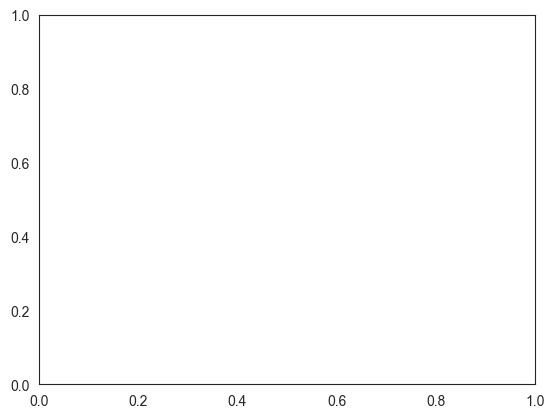

In [88]:
plt.scatter(y=dfinal['Personnage'], x=dfinal['Acte'],s=5*dfinal['Nb de mots'])
#plt.scatter(y=dfp.index, x=dfp.iloc[:,1],s=dfp.iloc[:,1])
#plt.scatter(y=dfp.index, x=dfp.iloc[:,2],s=dfp.iloc[:,2])

In [ ]:
dfinal.groupby(['Acte','Personnage']).sum()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_date1, test_date2 = '20200101', '20210630'

months = pd.date_range('2021-01-01', periods=12, freq='M').strftime('%B')
K = 2000
df = pd.DataFrame(np.random.choice(pd.date_range(test_date1, test_date2), K), columns=['Upload Date'])
df['Year'] = df['Upload Date'].dt.year
# df['Month'] = pd.Categorical(df['Upload Date'].dt.strftime('%B'), categories=months)
df['YearMonth'] = df['Upload Date'].dt.strftime('%Y%m').astype(int)
df['DocID'] = np.random.randint(100000, 200000, df.shape[0]).astype('str')
df['DocID'] = 'DOC' + df['DocID']

sns.set_style("white")
sns.set_color_codes("pastel")
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='YearMonth', data=df, ax=ax)
sns.despine()
yearmonth_labels = [int(l.get_text()) for l in ax.get_xticklabels()]
ax.set_xticklabels([months[ym % 100 - 1] for ym in yearmonth_labels])
ax.set_xlabel('')

# calculate the positions of the borders between the years
pos = []
years = []
prev = None
for i, ym in enumerate(yearmonth_labels):
    if ym // 100 != prev:
        pos.append(i)
        prev = ym // 100
        years.append(prev)
pos.append(len(yearmonth_labels))
pos = np.array(pos) - 0.5
# vertical lines to separate the years
ax.vlines(pos, 0, -0.12, color='black', lw=0.8, clip_on=False, transform=ax.get_xaxis_transform())
# years at the center of their range
for year, pos0, pos1 in zip(years, pos[:-1], pos[1:]):
    ax.text((pos0 + pos1) / 2, -0.07, year, ha='center', clip_on=False, transform=ax.get_xaxis_transform())

ax.set_xlim(pos[0], pos[-1])
ax.set_ylim(ymin=0)
plt.tight_layout()
plt.show()